In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib_inline.backend_inline import set_matplotlib_formats
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [4]:
# 한글 폰트
plt.rc("font", family = 'AppleGothic')
plt.rc("axes", unicode_minus = False)

# 글씨 선명하게
set_matplotlib_formats("retina")

In [5]:
ads_info = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정2_광고참여정보.csv')
print(f"데이터 수 : {ads_info.shape}")
ads_info.head()

데이터 수 : (16854865, 14)


,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,converted
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219,0
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,35.78.117.76,1
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,39.7.55.192,1
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157,0
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211,0


In [6]:
domain = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/참여적립조인.csv')
domain.head()

,Unnamed: 0,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,...,network,user_ip,rwd_idx,ads_code,advid,adv_cost,earn_cost,regdate,ctit,conversion
0,0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,...,0,16.184.28.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,...,NaN,35.78.117.76,238313226.0,yuRe4YoPuZ,40ceb01c-9b60-4452-bacd-0e061fb18ab4,180.0,170.0,2025-07-26 02:19:21,57.0,1
2,2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,...,WIFI,39.7.55.192,239017177.0,WuIp8HKmt9,73793f44-a471-4351-ae1c-d09accaf223a,170.0,120.0,2025-08-12 18:19:21,82.0,1
3,3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,...,0,211.252.100.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,...,0,3.38.148.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
ads_time = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/시간별적립보고서_1년치.csv')
print(f"데이터 수 : {ads_time.shape}")
ads_time.head()

데이터 수 : (6953146, 12)


,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_scost,rpt_time_acost,rpt_time_cost,rpt_time_earn,weekday,week_type
0,2024-07-27,0,4418,761,1,0,0,0,0,0,5,주말
1,2024-07-27,0,7377,213,1,0,0,0,0,0,5,주말
2,2024-07-27,0,7377,337,1,0,0,0,0,0,5,주말
3,2024-07-27,0,7377,496,1,1,230,230,180,180,5,주말
4,2024-07-27,0,7528,792,1,0,0,0,0,0,5,주말


In [8]:
domain = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/광고도메인리스트.csv')
domain.head()

,Unnamed: 0,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
0,0,6508,3u4lOKJAek,13,335,3,10,스마트피싱보호,https://seimg.pincrux.com/icon/1551770735.png,"[상품소개]\n알면 피하고, 모르면 당하는 보이스피싱\n나와 소중한 가족을 안전하게...",...,9999-12-31 00:00:00,0,100,7,1400,1100,2381500,NONE,2020-04-23 17:53:01 UTC,금융
1,1,6985,SijDrtH4GV,13,335,3,7,DB손해보험 다이렉트,https://seimg.pincrux.com/icon/1575337232.jpg,[참여방법]\n- 빠르고 간편한 DB손해보험 다이렉트에서\n- 내 차 보험료를 지금...,...,9999-06-06 00:00:00,0,100,7,2700,2300,1201938,NONE,2020-06-30 15:22:59 UTC,금융
2,2,8327,k1RZftVHoW,13,335,3,10,파일썬,https://static.i-screen.kr/img/ad/icon/aff_13_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,...,9999-12-31 23:59:00,0,100,7,3200,2420,1673458,NONE,2020-11-10 11:21:43 UTC,미디어/컨텐츠
3,3,9264,EGZcaVOtlc,23,220,3,10,하나 가득담은 운전자보험가입,https://i.imgur.com/kaWiYyT.png,하나손해보험 다이렉트 운전자보험 가입시\n\n01.참여방법\n1) 계산하기 페이지를...,...,9999-12-31 23:59:59,0,100,7,11000,8250,2372800,NONE,2020-11-30 15:16:45 UTC,금융
4,4,9716,NwZZq45Kgb,6,10,3,8,베이비러브 참여 신청,https://nextapps-nas.aws.appang.kr/icon/SDl2uC...,[참여방법]\n- 페이지 이동 > 베이버러브 참여신청 완료\n- 25-55세 SKT...,...,2029-11-29 00:00:00,25,55,2,600,480,2699900,NONE,2021-01-11 16:11:27 UTC,생활


In [9]:
domain.isna().sum()

Unnamed: 0            0
ads_idx               0
ads_code              0
aff_idx               0
adv_idx               0
ads_type              0
ads_category          0
ads_name              0
ads_icon_img          0
ads_summary           0
ads_save_way          0
ads_day_cap           0
ads_sdate             0
ads_edate             0
ads_age_min           0
ads_age_max           0
ads_os_type           0
ads_contract_price    0
ads_reward_price      0
ads_order             0
ads_rejoin_type       0
regdate               0
domain                0
dtype: int64

In [10]:
part_earn = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/참여적립조인.csv')
print(f"데이터 수 : {part_earn.shape}")
part_earn.head()

데이터 수 : (16854865, 22)


,Unnamed: 0,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,...,network,user_ip,rwd_idx,ads_code,advid,adv_cost,earn_cost,regdate,ctit,conversion
0,0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,...,0,16.184.28.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,...,NaN,35.78.117.76,238313226.0,yuRe4YoPuZ,40ceb01c-9b60-4452-bacd-0e061fb18ab4,180.0,170.0,2025-07-26 02:19:21,57.0,1
2,2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,...,WIFI,39.7.55.192,239017177.0,WuIp8HKmt9,73793f44-a471-4351-ae1c-d09accaf223a,170.0,120.0,2025-08-12 18:19:21,82.0,1
3,3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,...,0,211.252.100.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,...,0,3.38.148.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
ads_timee = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정_시간별적립보고서(최종).csv')
print(f"데이터 수 : {ads_timee.shape}")
ads_timee.head()

데이터 수 : (279916, 10)


,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_acost,rpt_time_earn,weekday,week_type
0,2025-07-27,0,11059,398,5,0,0,0,6,주말
1,2025-07-27,0,13209,583,3,0,0,0,6,주말
2,2025-07-27,0,13928,303,3,3,510,360,6,주말
3,2025-07-27,0,13928,324,3,3,510,360,6,주말
4,2025-07-27,0,13928,340,6,6,1020,720,6,주말


In [12]:
ads_info = ads_info.merge(
    domain[['ads_idx', 'domain']],
    on='ads_idx',
    how='left'
)


In [13]:
ads_info.isna().sum()

click_key               0
ads_idx                 0
dvc_idx                 0
mda_idx                 0
pub_sub_rel_id          0
contract_price          0
media_price             0
click_day               0
click_time              0
click_date              0
exp_day                 0
network           2501362
user_ip                 9
converted               0
domain                  0
dtype: int64

In [14]:
ads_time.head()

,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_scost,rpt_time_acost,rpt_time_cost,rpt_time_earn,weekday,week_type
0,2024-07-27,0,4418,761,1,0,0,0,0,0,5,주말
1,2024-07-27,0,7377,213,1,0,0,0,0,0,5,주말
2,2024-07-27,0,7377,337,1,0,0,0,0,0,5,주말
3,2024-07-27,0,7377,496,1,1,230,230,180,180,5,주말
4,2024-07-27,0,7528,792,1,0,0,0,0,0,5,주말


In [15]:
cl_domain = domain.drop(['Unnamed: 0','ads_icon_img', 'ads_summary', 'ads_sdate', 
                         'ads_age_min', 'ads_age_max', 'regdate', 'ads_contract_price', 'ads_reward_price'], axis = 1)

In [16]:
cl_part_earn = part_earn.drop(['Unnamed: 0', 'click_key', 'click_day', 'dvc_idx', 'user_ip'], axis=1)

In [17]:
machesa = cl_part_earn.merge(cl_domain, on = ['ads_idx'], how='left')

In [18]:
machesa.drop(['ads_code_x'], axis = 1, inplace=True)

In [19]:
machesa.rename(columns={"ads_code_y":"ads_code"}, inplace=True)

In [20]:
machesa.head()

,ads_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_time,click_date,exp_day,network,rwd_idx,...,ads_type,ads_category,ads_name,ads_save_way,ads_day_cap,ads_edate,ads_os_type,ads_order,ads_rejoin_type,domain
0,313780,539,144350110,6000,4500,21,2025-08-17 21:07:37,2025-09-16,0,NaN,...,3,5,The Farmers,레벨 50 완료,False,2031-01-03 00:00:00,2,2447700,NONE,게임
1,412426,58,46032732,180,170,2,2025-07-26 02:18:24,2025-08-25,NaN,238313226.0,...,1,2,용칼이 키우기 : 용가리알 무한 지급!,받기,False,2025-07-28 00:00:00,2,2749100,NONE,게임
2,443660,808,1,170,120,18,2025-08-12 18:17:59,2025-09-11,WIFI,239017177.0,...,1,0,[간편참여] 편의점 정리왕 3D,받기,False,9999-12-31 23:59:59,2,2758100,NONE,생활
3,360192,539,144350110,6000,4500,3,2025-08-17 03:35:02,2025-09-16,0,NaN,...,3,5,Merge Islanders: Magic Puzzle,15일차 완료,False,2031-01-03 00:00:00,2,2449700,NONE,게임
4,372307,539,144350110,15600,11700,8,2025-08-18 08:01:26,2025-09-17,0,NaN,...,3,5,"Happy Color® - 컬러링북, 숫자 색칠 게임",그림 250개 색칠,False,2031-01-03 00:00:00,2,2456300,NONE,게임


In [21]:
domain_dummies = pd.get_dummies(machesa['domain'], prefix = "domain")
df_domain = pd.concat([machesa[['mda_idx']], domain_dummies], axis=1)
domain_features = df_domain.groupby('mda_idx').sum()
domain_features.isna().sum()

domain_게임         0
domain_교육         0
domain_금융         0
domain_기타         0
domain_미디어/컨텐츠    0
domain_뷰티         0
domain_비영리/공공     0
domain_생활         0
domain_식당/카페      0
domain_식음료        0
domain_운동/스포츠     0
domain_운세         0
domain_의료/건강      0
domain_채용         0
domain_커머스        0
dtype: int64

In [22]:
domain_features.head()

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
mda_idx,,,,,,,,,,,,,,,
12,187866,0,3971,0,53,0,7300,1479,0,643,0,0,131,0,30995
14,38866,0,3560,57,15755,5941,0,6248,0,6437,0,0,4810,888,2201
18,3315,0,914,0,1070,0,0,617,0,0,0,0,0,0,45
22,37240,16,11756,0,15966,530,4813,2867,29,1138,367,40,2462,3156,2975
26,423,0,41,0,20,0,0,115,0,0,0,0,0,0,79


In [23]:
# 비율로 정규화
norm_domain_features = domain_features.div(domain_features.sum(axis=1), axis=0)
norm_domain_features

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
mda_idx,,,,,,,,,,,,,,,
12,0.808241,0.000000,0.017084,0.000000,0.000228,0.000000,0.031406,0.006363,0.000000,0.002766,0.000000,0.000000,0.000564,0.000000,0.133347
14,0.458526,0.000000,0.041999,0.000672,0.185871,0.070090,0.000000,0.073711,0.000000,0.075941,0.000000,0.000000,0.056746,0.010476,0.025967
18,0.556115,0.000000,0.153330,0.000000,0.179500,0.000000,0.000000,0.103506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007549
22,0.446764,0.000192,0.141035,0.000000,0.191542,0.006358,0.057741,0.034395,0.000348,0.013652,0.004403,0.000480,0.029536,0.037862,0.035691
26,0.623894,0.000000,0.060472,0.000000,0.029499,0.000000,0.000000,0.169617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1051,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1055,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 다시다시 !!

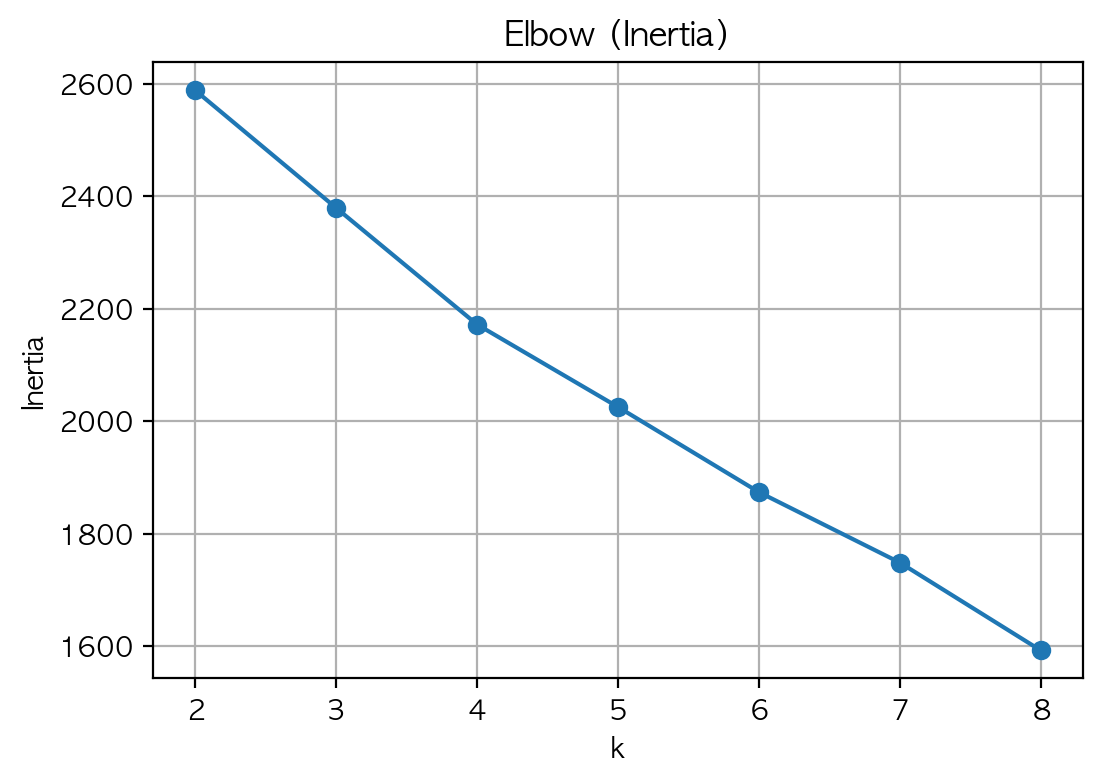

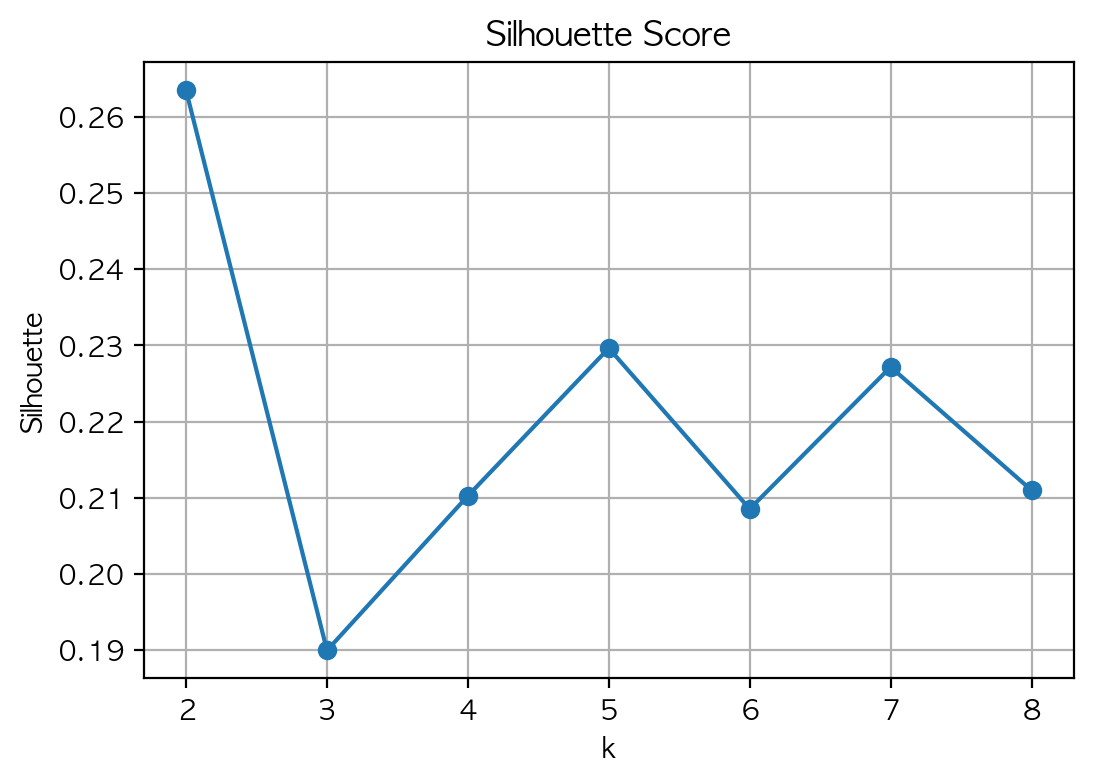

[INFO] 선택된 k = 2


,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
cluster,,,,,,,,,,,,,,,
0,0.355082,0.008154,0.052659,0.020280,0.050731,0.026844,0.030234,0.060569,0.045059,0.037800,0.011555,0.052461,0.043568,0.027541,0.177462
1,0.196989,0.000074,0.382529,0.000465,0.139530,0.023124,0.005997,0.063444,0.020234,0.002717,0.000243,0.005523,0.003676,0.106192,0.049261


,top_domains
cluster,
0,"게임(35.51%), 커머스(17.75%), 생활(6.06%), 금융(5.27%),..."
1,"금융(38.25%), 게임(19.70%), 미디어/컨텐츠(13.95%), 채용(10..."


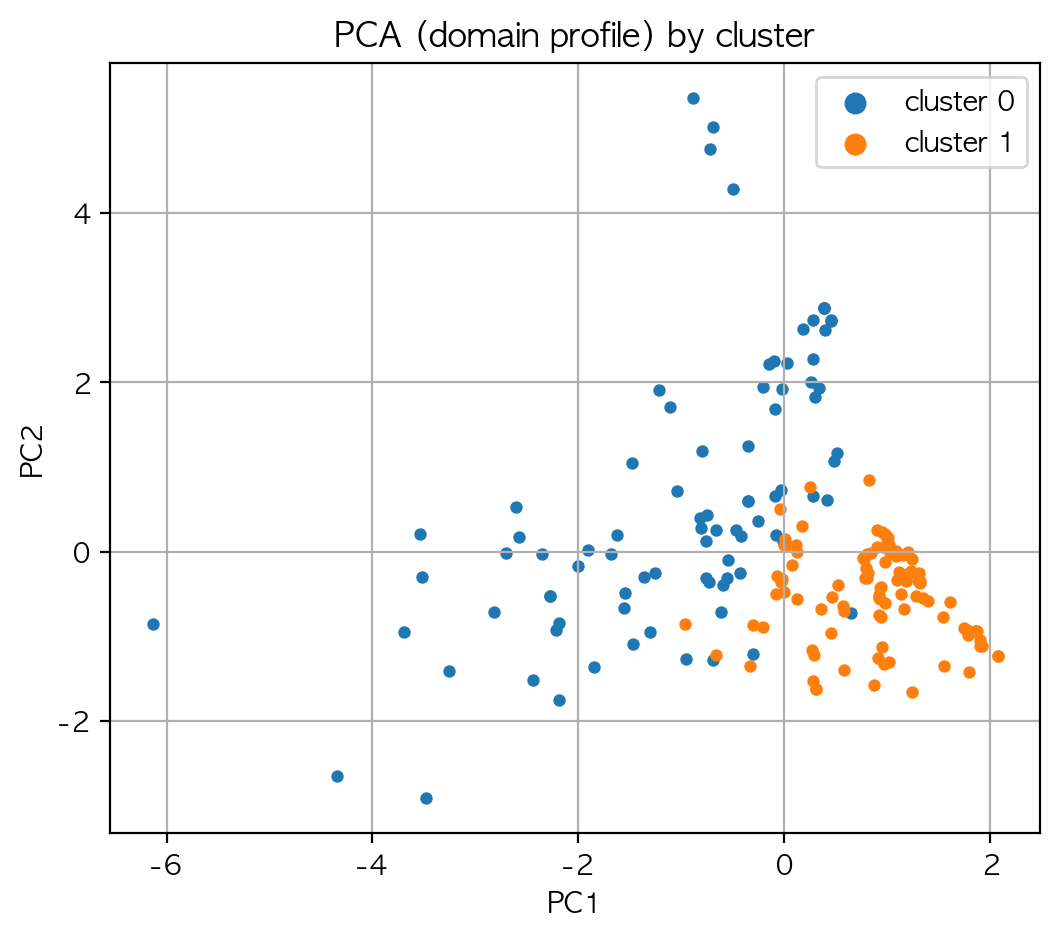

[DONE] mda_idx 클러스터링 완료


In [24]:
# ----------------------------------
# 0) 데이터 준비
# ----------------------------------
# domain_features: df_domain.groupby('mda_idx').sum() 결과라고 가정
# 예시) domain_features.head()
# index = mda_idx, columns = ["domain_게임", "domain_교육", ...]
df = domain_features.copy()

# 결측치/무한대 정리
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# (선택) 활동량 편차가 크다면 비율(정규화) 기반 특징으로 변환 권장
# 각 mda_idx의 총합으로 나눠 도메인 분포(확률)로 변환
row_sum = df.sum(axis=1)
row_sum[row_sum == 0] = 1  # 0 division 방지
df_ratio = df.div(row_sum, axis=0)

# (선택) 0-분산(상수)인 컬럼 제거 (학습 안정성)
var = df_ratio.var(axis=0)
keep_cols = var[var > 0].index
X = df_ratio[keep_cols].values

# 1) 스케일링
scaler = StandardScaler()  # 혹은 MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2) k 값 탐색 (엘보 & 실루엣)
ks = range(2, 9)  # 2~8개 군집 범위 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# 엘보 그래프
plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.title('Elbow (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 실루엣 그래프 (값이 클수록 분리가 잘됨)
plt.figure(figsize=(6,4))
plt.plot(list(ks), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

# 3) 최종 KMeans 학습 (실루엣/엘보 보고 k 선택)
best_k = int(ks[int(np.argmax(sil_scores))])  # 실루엣 최고 k 자동 선택
print(f"[INFO] 선택된 k = {best_k}")

kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 결과 붙이기
result = pd.DataFrame(index=df_ratio.index)
result["cluster"] = labels

# 4) 클러스터 프로필(도메인 평균 분포)
cluster_profile = (
    pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
    .assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .sort_index()
)

# 각 클러스터에서 비중이 큰 상위 도메인 Top-N 뽑기
def top_domains(profile_row, topn=5):
    s = profile_row.sort_values(ascending=False).head(topn)
    return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

topn = 5
top_table = pd.DataFrame({
    "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
}, index=cluster_profile.index)

display(cluster_profile.head())      # 클러스터별 평균 분포 (수치)
display(top_table)                   # 클러스터별 상위 도메인 요약 (가독성)

# 5) 2D 시각화 (PCA)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
plt.title("PCA (domain profile) by cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.grid(True)
plt.show()

# 6) 결과 저장 (선택)
# mda_idx별 클러스터 라벨
result.to_csv("mda_idx_cluster_labels.csv", encoding="utf-8-sig")
# 클러스터별 도메인 분포(평균)
cluster_profile.to_csv("cluster_profile_domain_ratio.csv", encoding="utf-8-sig")
top_table.to_csv("cluster_top_domains.csv", encoding="utf-8-sig")

print("[DONE] mda_idx 클러스터링 완료")


========== k=3 결과 ==========


,top_domains
cluster,
0,"게임(74.47%), 커머스(4.75%), 기타(3.69%), 금융(3.32%), ..."
1,"커머스(25.90%), 게임(11.93%), 운세(8.44%), 생활(7.45%),..."
2,"금융(38.06%), 게임(20.48%), 미디어/컨텐츠(13.58%), 채용(10..."


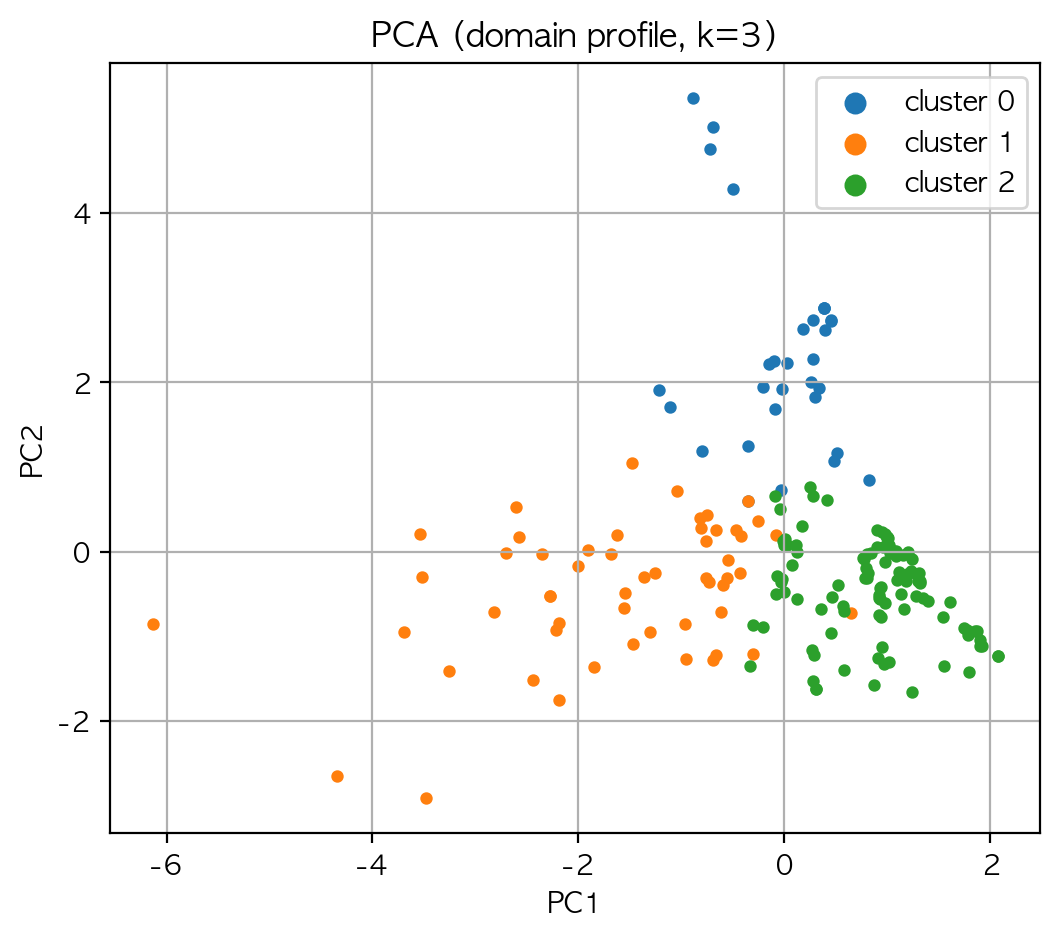

========== k=4 결과 ==========


,top_domains
cluster,
0,"게임(67.09%), 비영리/공공(5.03%), 식음료(5.02%), 커머스(4.3..."
1,"커머스(28.71%), 게임(11.88%), 생활(8.19%), 식당/카페(7.57..."
2,"운동/스포츠(50.00%), 운세(50.00%), 게임(0.00%), 교육(0.00..."
3,"금융(37.92%), 게임(20.24%), 미디어/컨텐츠(13.53%), 채용(10..."


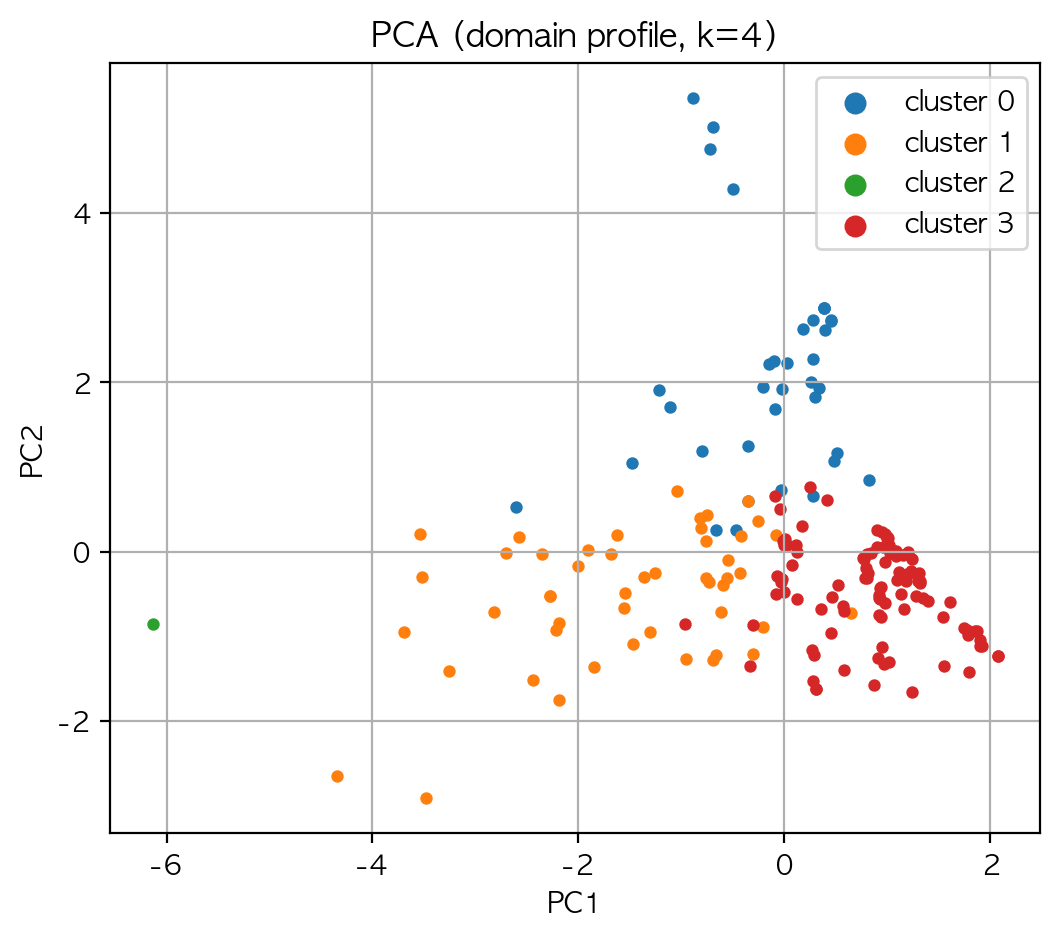

========== k=5 결과 ==========


,top_domains
cluster,
0,"게임(74.47%), 커머스(4.75%), 기타(3.69%), 금융(3.32%), ..."
1,"커머스(26.18%), 게임(12.16%), 운세(7.66%), 생활(7.59%),..."
2,"운동/스포츠(50.00%), 운세(50.00%), 게임(0.00%), 교육(0.00..."
3,"교육(33.33%), 미디어/컨텐츠(33.33%), 커머스(33.33%), 게임(0..."
4,"금융(37.86%), 게임(20.68%), 미디어/컨텐츠(13.72%), 채용(10..."


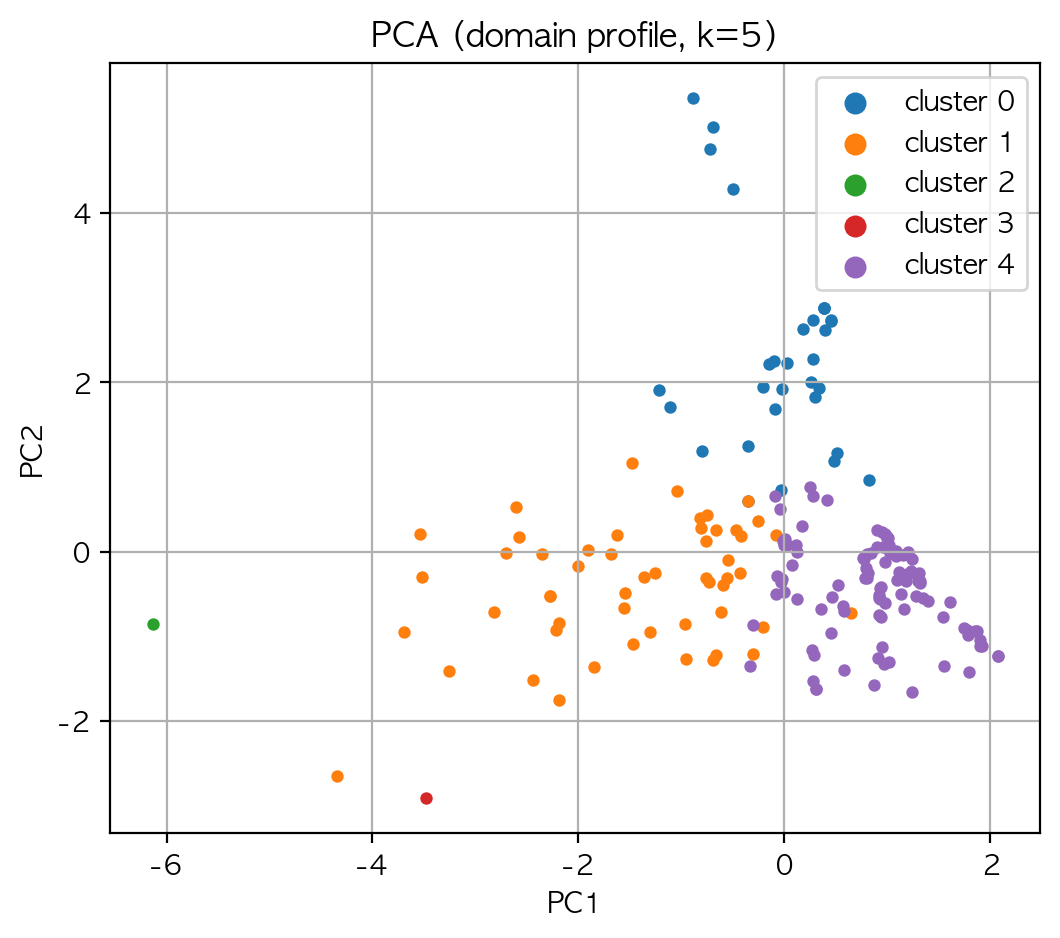

In [25]:
# ==============================
# k=3,4,5 클러스터링 결과 비교
# ==============================

for k in [3, 4, 5]:
    print("="*10, f"k={k} 결과", "="*10)
    
    # KMeans 학습
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # 결과 저장
    result = pd.DataFrame(index=df_ratio.index)
    result["cluster"] = labels
    
    # 클러스터 프로필
    cluster_profile = (
        pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
        .assign(cluster=labels)
        .groupby("cluster")
        .mean()
        .sort_index()
    )
    
    # 각 클러스터 대표 도메인 Top-N
    def top_domains(profile_row, topn=5):
        s = profile_row.sort_values(ascending=False).head(topn)
        return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

    topn = 5
    top_table = pd.DataFrame({
        "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
    }, index=cluster_profile.index)

    display(top_table)   # 클러스터별 상위 도메인 요약
    
    # PCA 시각화
    pca = PCA(n_components=2, random_state=42)
    coords = pca.fit_transform(X_scaled)

    plt.figure(figsize=(6,5))
    for c in range(k):
        idx = (labels == c)
        plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
    plt.title(f"PCA (domain profile, k={k})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(markerscale=2)
    plt.grid(True)
    plt.show()


In [26]:
# 클러스터별 매체사 리스트 뽑기
cluster_members = {
    c: result[result["cluster"] == c].index.tolist()
    for c in sorted(result["cluster"].unique())
}

# 확인
for c, mda_list in cluster_members.items():
    print(f"=== Cluster {c} 매체사 ===")
    print(mda_list[:20])  # 너무 많으면 앞 20개만 출력
    print(f"... 총 {len(mda_list)}개 매체사\n")


=== Cluster 0 매체사 ===
[12, 14, 18, 26, 56, 58, 87, 108, 270, 290, 342, 343, 344, 396, 397, 539, 540, 643, 651, 652]
... 총 31개 매체사

=== Cluster 1 매체사 ===
[32, 54, 73, 291, 337, 356, 371, 375, 384, 385, 389, 398, 409, 437, 442, 458, 480, 481, 492, 562]
... 총 53개 매체사

=== Cluster 2 매체사 ===
[374]
... 총 1개 매체사

=== Cluster 3 매체사 ===
[710]
... 총 1개 매체사

=== Cluster 4 매체사 ===
[22, 30, 246, 281, 294, 303, 324, 340, 341, 401, 482, 496, 564, 578, 579, 582, 583, 621, 630, 637]
... 총 103개 매체사



[INFO] 선택된 k = 3


,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
cluster,,,,,,,,,,,,,,,
0,0.744729,0.000055,0.033192,0.036886,0.030680,0.007546,0.009153,0.032496,0.003297,0.019815,0.000369,0.006850,0.024074,0.003328,0.047530
1,0.119334,0.012952,0.061459,0.010291,0.067693,0.039080,0.039972,0.074475,0.068670,0.048055,0.017820,0.084429,0.053995,0.042756,0.259019
2,0.204772,0.000075,0.380591,0.000893,0.135846,0.022558,0.007458,0.064564,0.020662,0.003090,0.000433,0.002972,0.004455,0.104753,0.046876


,top_domains
cluster,
0,"게임(74.47%), 커머스(4.75%), 기타(3.69%), 금융(3.32%), ..."
1,"커머스(25.90%), 게임(11.93%), 운세(8.44%), 생활(7.45%),..."
2,"금융(38.06%), 게임(20.48%), 미디어/컨텐츠(13.58%), 채용(10..."


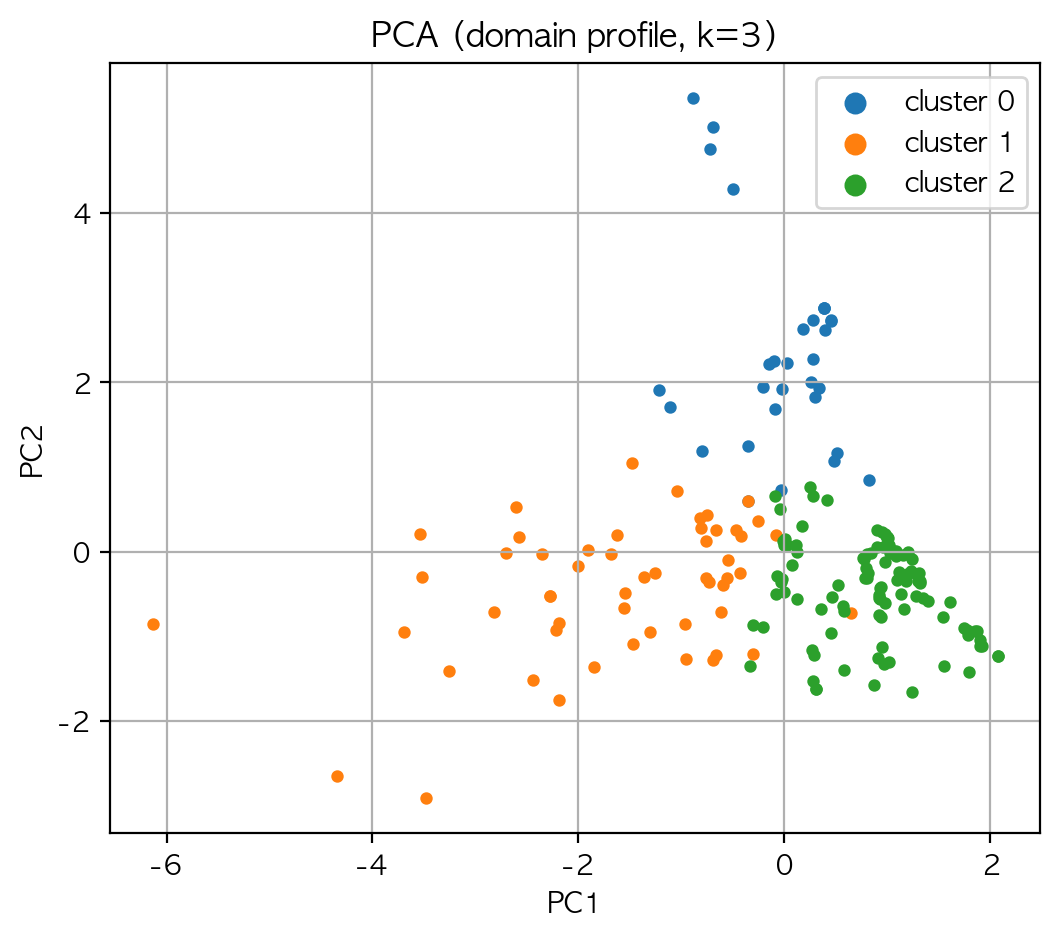

In [27]:
# 3) 최종 KMeans 학습 (k=3으로 직접 설정)
best_k = 3
print(f"[INFO] 선택된 k = {best_k}")

kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 결과 붙이기
result = pd.DataFrame(index=df_ratio.index)
result["cluster"] = labels

# 4) 클러스터 프로필(도메인 평균 분포)
cluster_profile = (
    pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
    .assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .sort_index()
)

# 각 클러스터에서 비중이 큰 상위 도메인 Top-N 뽑기
def top_domains(profile_row, topn=5):
    s = profile_row.sort_values(ascending=False).head(topn)
    return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

topn = 5
top_table = pd.DataFrame({
    "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
}, index=cluster_profile.index)

display(cluster_profile)      # 클러스터별 평균 분포 (수치)
display(top_table)            # 클러스터별 상위 도메인 요약 (가독성)

# 5) 2D 시각화 (PCA)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
plt.title("PCA (domain profile, k=3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.grid(True)
plt.show()


In [28]:
# 클러스터별 매체사 리스트 뽑기
cluster_members = {
    c: result[result["cluster"] == c].index.tolist()
    for c in sorted(result["cluster"].unique())
}

# 확인
for c, mda_list in cluster_members.items():
    print(f"=== Cluster {c} 매체사 ===")
    print(mda_list[:20])  # 너무 많으면 앞 20개만 출력
    print(f"... 총 {len(mda_list)}개 매체사\n")


=== Cluster 0 매체사 ===
[12, 14, 18, 26, 56, 58, 87, 108, 270, 290, 342, 343, 344, 396, 397, 539, 540, 643, 651, 652]
... 총 31개 매체사

=== Cluster 1 매체사 ===
[32, 54, 73, 291, 337, 356, 371, 374, 375, 385, 389, 398, 409, 437, 442, 458, 480, 481, 492, 562]
... 총 54개 매체사

=== Cluster 2 매체사 ===
[22, 30, 246, 281, 294, 303, 324, 340, 341, 384, 401, 482, 496, 564, 578, 579, 582, 583, 621, 630]
... 총 104개 매체사



In [29]:
# 출력 행/열 제한 해제
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# # 출력 행/열 제한 복원
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")

In [31]:
ads_timee.head()

,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_acost,rpt_time_earn,weekday,week_type
0,2025-07-27,0,11059,398,5,0,0,0,6,주말
1,2025-07-27,0,13209,583,3,0,0,0,6,주말
2,2025-07-27,0,13928,303,3,3,510,360,6,주말
3,2025-07-27,0,13928,324,3,3,510,360,6,주말
4,2025-07-27,0,13928,340,6,6,1020,720,6,주말


In [43]:
ads_time['rpt_time_date'] = pd.to_datetime(ads_time['rpt_time_date'], errors='coerce')
ads_time = ads_time[ads_time['rpt_time_date'] >= '2025-07-27']

ads_time['weekday'] = ads_time['rpt_time_date'].dt.dayofweek  # 0=월 ~ 6=일

def daypart(h):
    if 6 <= h < 10:  return '아침(06-10)'
    if 10 <= h < 14: return '낮(10-14)'
    if 14 <= h < 18: return '오후(14-18)'
    if 18 <= h < 22: return '저녁(18-22)'
    if 22 <= h or h < 2: return '심야(22-02)'
    return '새벽(02-06)'

ads_time['daypart'] = ads_time['rpt_time_time'].apply(daypart)

In [44]:
summary = (
    ads_time.groupby(['mda_idx','weekday','daypart'], as_index=False)
            .agg(clicks=('rpt_time_clk','sum'),
                 turns=('rpt_time_turn','sum'))
)

In [45]:
summary['cvr'] = np.where(summary['clicks'] > 0,
                          summary['turns'] / summary['clicks'], 0.0)
summary = summary.replace([np.inf, -np.inf], 0.0)


In [46]:
best_eff = (summary.sort_values(['mda_idx','cvr'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='최고 효율'))

best_clk = (summary.sort_values(['mda_idx','clicks'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='최다 클릭'))

final_result = pd.concat([best_eff, best_clk], ignore_index=True)


In [47]:
weekday_map = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
final_result['weekday_name'] = final_result['weekday'].map(weekday_map)

eff = final_result[final_result['type']=='최고 효율'] \
        .rename(columns={'weekday_name':'weekday_name_eff',
                         'daypart':'daypart_eff',
                         'clicks':'clicks_eff',
                         'turns':'turns_eff',
                         'cvr':'cvr_eff'}) \
        [['mda_idx','weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff']]

vol = final_result[final_result['type']=='최다 클릭'] \
        .rename(columns={'weekday_name':'weekday_name_vol',
                         'daypart':'daypart_vol',
                         'clicks':'clicks_vol',
                         'turns':'turns_vol',
                         'cvr':'cvr_vol'}) \
        [['mda_idx','weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol']]


In [48]:
time_report = eff.merge(vol, on='mda_idx', how='outer')

In [49]:
time_report['slot_match'] = (
    (time_report['weekday_name_eff'] == time_report['weekday_name_vol']) &
    (time_report['daypart_eff'] == time_report['daypart_vol'])
)


In [50]:
time_report = time_report[[
    'mda_idx',
    'weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff',
    'weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol',
    'slot_match'
]].sort_values('mda_idx').reset_index(drop=True)

In [51]:
time_report

,mda_idx,weekday_name_eff,daypart_eff,clicks_eff,turns_eff,cvr_eff,weekday_name_vol,daypart_vol,clicks_vol,turns_vol,cvr_vol,slot_match
0,12,목,저녁(18-22),3550,1716,0.483380,토,새벽(02-06),21824,9273,0.424899,False
1,14,금,심야(22-02),5261,2125,0.403916,금,심야(22-02),5261,2125,0.403916,True
2,18,월,낮(10-14),174,15,0.086207,수,저녁(18-22),268,9,0.033582,False
3,22,금,아침(06-10),2346,1561,0.665388,일,새벽(02-06),3689,1888,0.511792,False
4,26,목,새벽(02-06),17,8,0.470588,일,아침(06-10),49,4,0.081633,False
5,30,토,심야(22-02),166,65,0.391566,월,오후(14-18),1047,68,0.064947,False
6,32,목,아침(06-10),14,5,0.357143,목,오후(14-18),198,21,0.106061,False
7,54,금,낮(10-14),239,115,0.481172,화,오후(14-18),653,117,0.179173,False
8,56,목,오후(14-18),2319,902,0.388961,목,저녁(18-22),2668,876,0.328336,False
9,58,금,새벽(02-06),12629,7189,0.569245,금,저녁(18-22),41224,16278,0.394867,False


In [52]:
time_report["daypart_eff"] = time_report["daypart_eff"].str.replace(r"\(.*\)", "", regex=True).str.strip()
time_report["daypart_vol"] = time_report["daypart_vol"].str.replace(r"\(.*\)", "", regex=True).str.strip()


In [53]:
time_report

,mda_idx,weekday_name_eff,daypart_eff,clicks_eff,turns_eff,cvr_eff,weekday_name_vol,daypart_vol,clicks_vol,turns_vol,cvr_vol,slot_match
0,12,목,저녁,3550,1716,0.483380,토,새벽,21824,9273,0.424899,False
1,14,금,심야,5261,2125,0.403916,금,심야,5261,2125,0.403916,True
2,18,월,낮,174,15,0.086207,수,저녁,268,9,0.033582,False
3,22,금,아침,2346,1561,0.665388,일,새벽,3689,1888,0.511792,False
4,26,목,새벽,17,8,0.470588,일,아침,49,4,0.081633,False
5,30,토,심야,166,65,0.391566,월,오후,1047,68,0.064947,False
6,32,목,아침,14,5,0.357143,목,오후,198,21,0.106061,False
7,54,금,낮,239,115,0.481172,화,오후,653,117,0.179173,False
8,56,목,오후,2319,902,0.388961,목,저녁,2668,876,0.328336,False
9,58,금,새벽,12629,7189,0.569245,금,저녁,41224,16278,0.394867,False


/Users/sparta/Documents/GitHub/final_project/venv/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


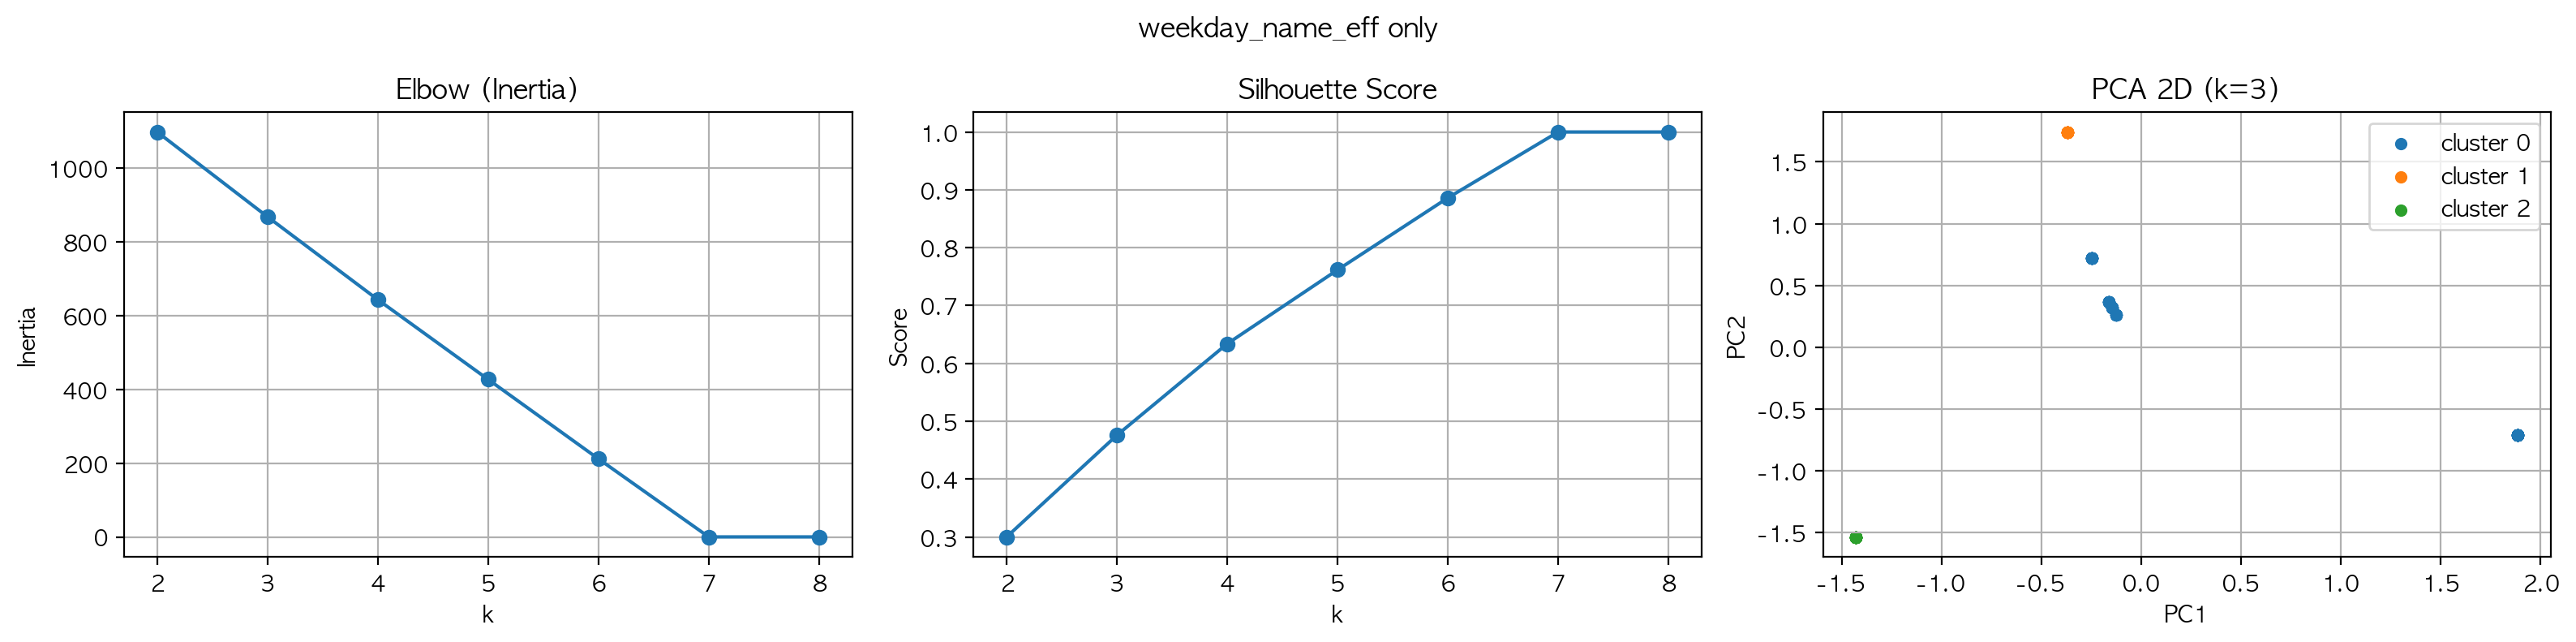

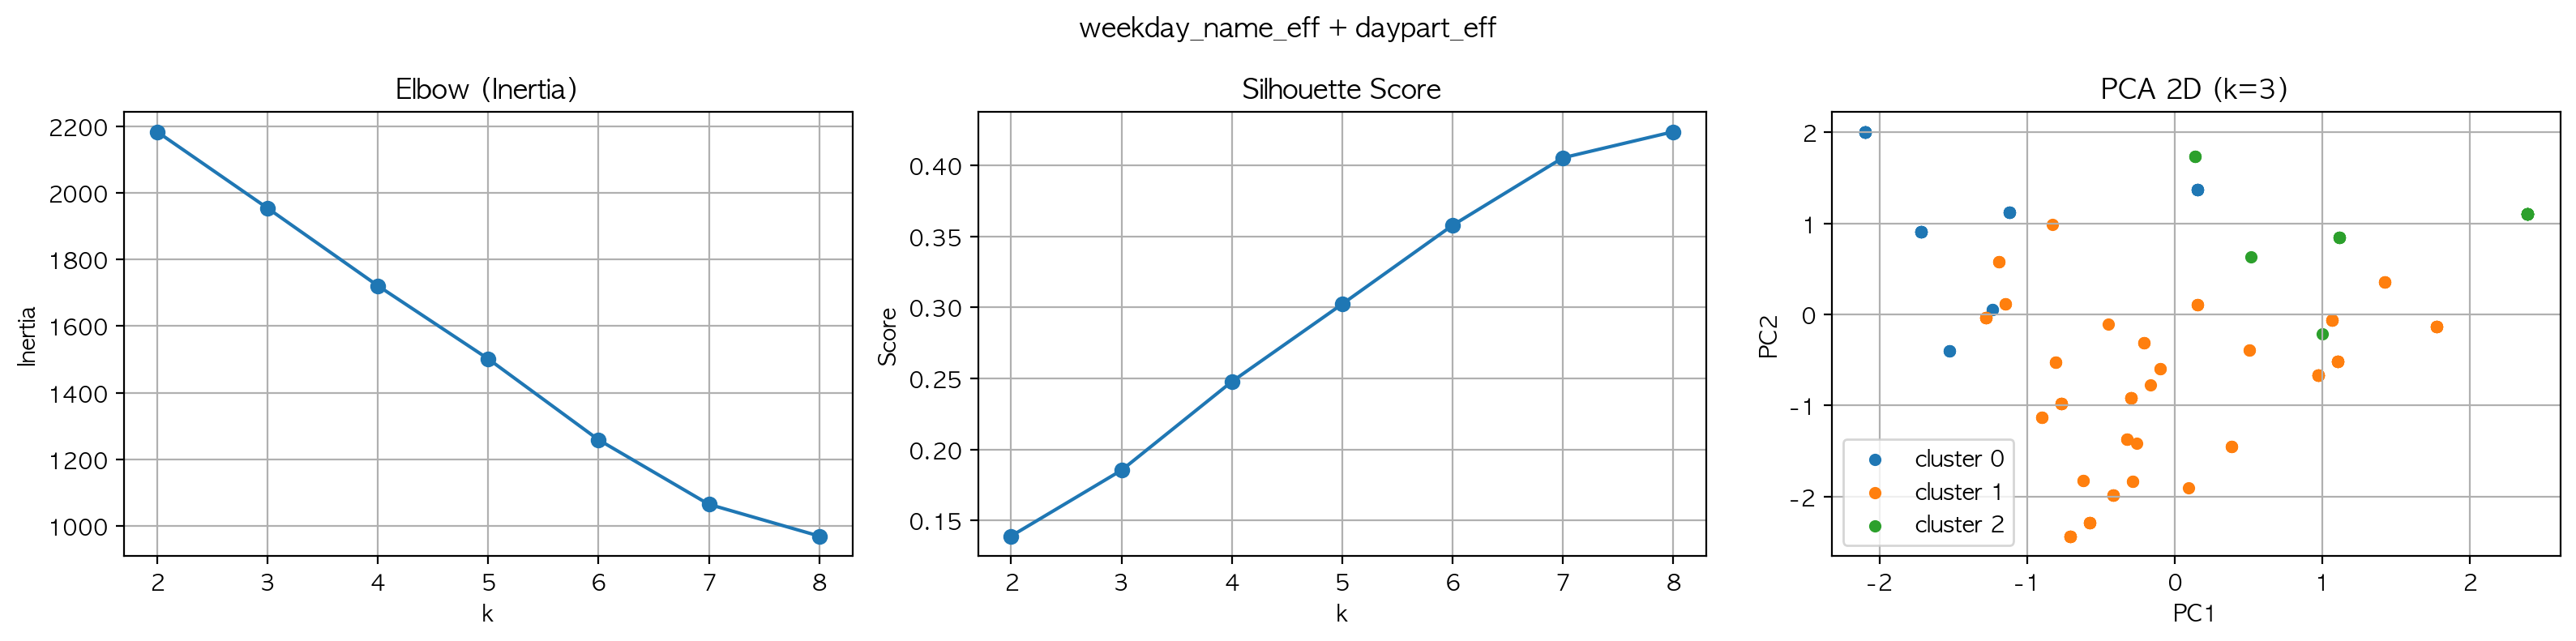

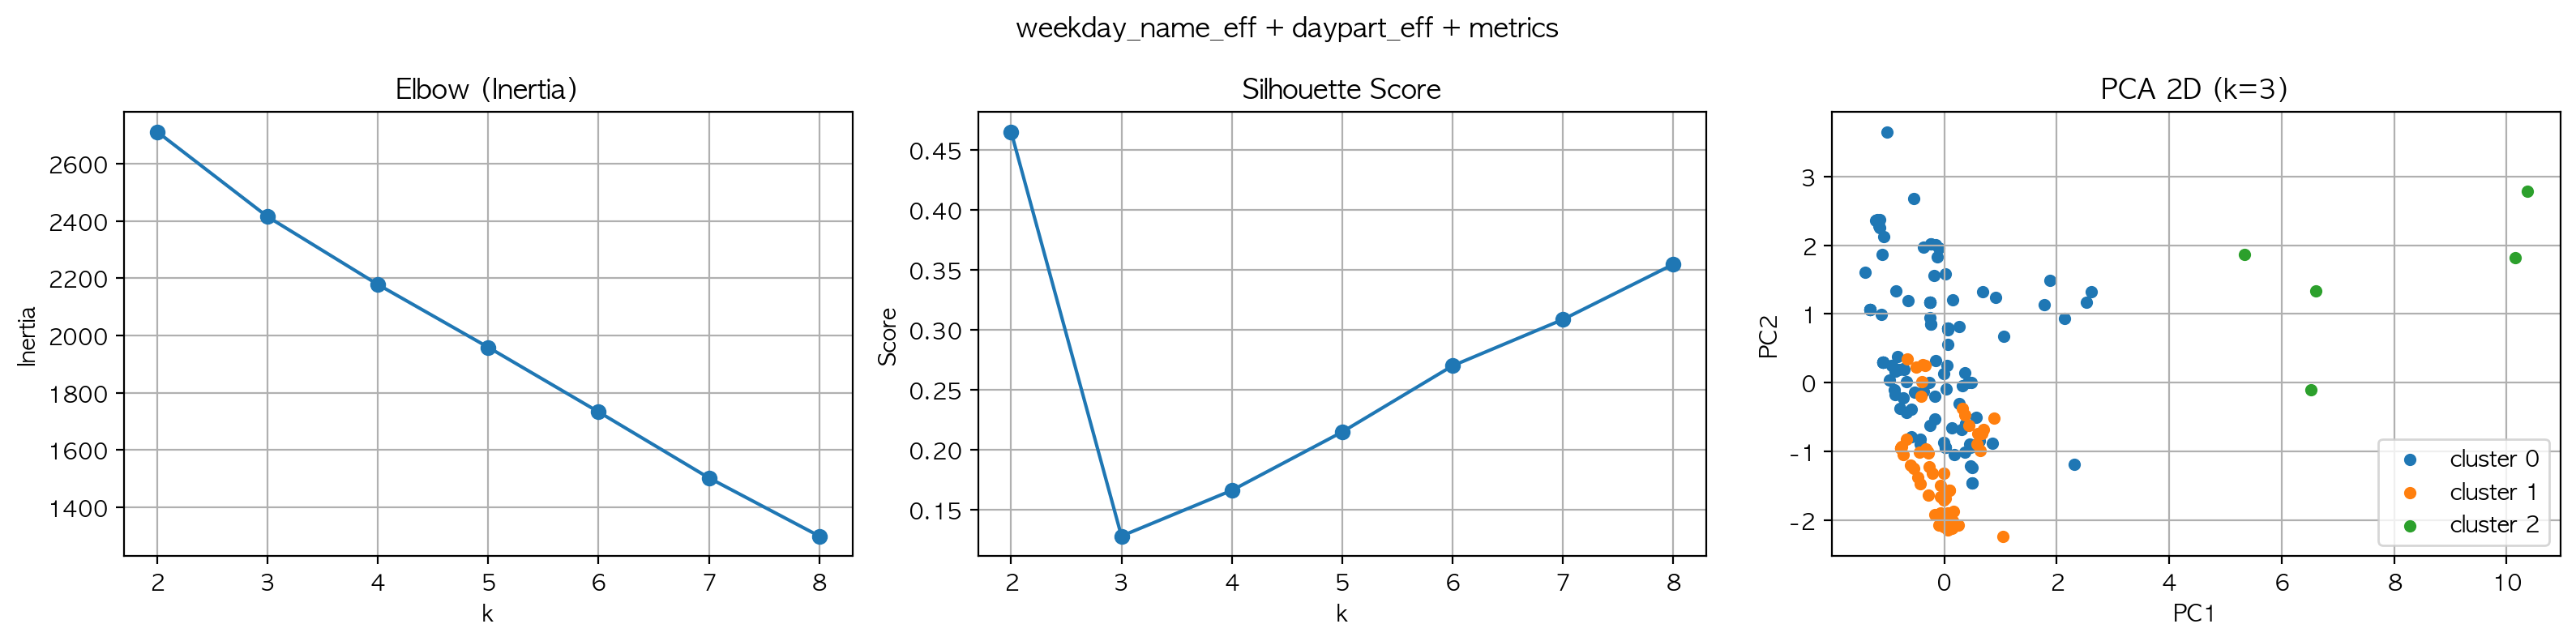


[Profile] X1:
              0      1      2      3      4      5      6
cluster                                                 
0        0.338  0.256  0.187 -0.515  0.153 -0.457  0.206
1       -0.547 -0.414 -0.302 -0.515 -0.247  2.188 -0.332
2       -0.547 -0.414 -0.302  1.943 -0.247 -0.457 -0.332

[Profile] X2:
              0      1      2      3      4      5      6      7      8      9  \
cluster                                                                         
0        1.828 -0.414 -0.302 -0.515 -0.247 -0.457 -0.332 -0.134 -0.382 -0.043   
1       -0.547  0.280  0.204  0.348  0.167 -0.457  0.224  0.153 -0.052 -0.008   
2       -0.547 -0.414 -0.302 -0.515 -0.247  2.188 -0.332 -0.351  0.689  0.084   

            10     11     12  
cluster                       
0       -0.138  0.200  0.545  
1        0.109  0.012 -0.144  
2       -0.193 -0.309 -0.228  

[Profile] X3:
              0      1      2      3      4      5      6      7      8      9  \
cluster                  

In [ ]:
# --------------------------------------------------
# 유틸: 엘보/실루엣 계산 + PCA 2D 산점도
# --------------------------------------------------
def elbow_sil_pca_plot(X, k_set: int, title: str, k_range=range(2, 9), point_size=20):
    """
    X: numpy array or DataFrame (피처 행렬; 스케일링 전 상태여도 됨)
    k_set: 사용자가 지정한 k로 KMeans 클러스터 후 PCA 산점도 표시
    k_range: 엘보/실루엣 계산 범위
    """
    # NaN/Inf 방지
    X = pd.DataFrame(X).replace([np.inf, -np.inf], np.nan).fillna(0.0).values

    # 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 엘보/실루엣
    inertias, sils = [], []
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=42, n_init=50)
        labels = km.fit_predict(X_scaled)
        inertias.append(km.inertia_)
        sils.append(silhouette_score(X_scaled, labels))

    # 최종 KMeans (사용자 지정 k)
    kmeans = KMeans(n_clusters=k_set, random_state=42, n_init=50)
    labels = kmeans.fit_predict(X_scaled)

    # PCA 2D
    pca = PCA(n_components=2, random_state=42)
    coords = pca.fit_transform(X_scaled)

    # 그림
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    # Elbow
    axes[0].plot(list(k_range), inertias, marker='o')
    axes[0].set_title('Elbow (Inertia)')
    axes[0].set_xlabel('k'); axes[0].set_ylabel('Inertia'); axes[0].grid(True)

    # Silhouette
    axes[1].plot(list(k_range), sils, marker='o')
    axes[1].set_title('Silhouette Score')
    axes[1].set_xlabel('k'); axes[1].set_ylabel('Score'); axes[1].grid(True)

    # PCA scatter
    for c in range(k_set):
        idx = (labels == c)
        axes[2].scatter(coords[idx, 0], coords[idx, 1], s=point_size, label=f'cluster {c}')
    axes[2].set_title(f'PCA 2D (k={k_set})')
    axes[2].set_xlabel('PC1'); axes[2].set_ylabel('PC2'); axes[2].legend(); axes[2].grid(True)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    # 클러스터 결과 요약(평균값)도 반환
    return labels, pd.DataFrame(X_scaled).assign(cluster=labels).groupby('cluster').mean()

# --------------------------------------------------
# 피처 구성 함수들 (time_report 이용)
# --------------------------------------------------
def build_X1(df: pd.DataFrame):
    """1) weekday_name_eff 만 사용"""
    X = pd.get_dummies(df[['weekday_name_eff']], drop_first=False)
    return X

def build_X2(df: pd.DataFrame):
    """2) weekday_name_eff + daypart_eff 사용"""
    # daypart의 (18-22) 같은 시간대 괄호 제거(있다면)
    X_cat = df[['weekday_name_eff', 'daypart_eff']].copy()
    X_cat['daypart_eff'] = X_cat['daypart_eff'].astype(str).str.replace(r"\(.*\)", "", regex=True).str.strip()
    X = pd.get_dummies(X_cat, drop_first=False)
    return X

def build_X3(df: pd.DataFrame):
    """3) weekday_name_eff + daypart_eff + 성과지표(clicks/turns/cvr)"""
    X_cat = df[['weekday_name_eff', 'daypart_eff']].copy()
    X_cat['daypart_eff'] = X_cat['daypart_eff'].astype(str).str.replace(r"\(.*\)", "", regex=True).str.strip()
    X_cat = pd.get_dummies(X_cat, drop_first=False)

    # 성과지표 안전 계산(cvr 재계산; inf/NaN은 0)
    met = df[['clicks_eff', 'turns_eff']].copy()
    met = met.fillna(0)
    met['cvr_eff'] = np.where(met['clicks_eff'] > 0, met['turns_eff'] / met['clicks_eff'], 0.0)
    met = met.replace([np.inf, -np.inf], 0.0).fillna(0.0)

    X = pd.concat([X_cat, met], axis=1)
    return X

# --------------------------------------------------
# 실행: k를 직접 지정해서 3가지 클러스터링을 수행
# --------------------------------------------------
# 원하는 k 설정
k1, k2, k3 = 3, 3, 3   # <- 여기서 자유롭게 조정

# 1) weekday_name_eff only
X1 = build_X1(time_report)
labels1, prof1 = elbow_sil_pca_plot(X1, k_set=k1, title='weekday_name_eff only')

# 2) weekday_name_eff + daypart_eff
X2 = build_X2(time_report)
labels2, prof2 = elbow_sil_pca_plot(X2, k_set=k2, title='weekday_name_eff + daypart_eff')

# 3) weekday_name_eff + daypart_eff + metrics
X3 = build_X3(time_report)
labels3, prof3 = elbow_sil_pca_plot(X3, k_set=k3, title='weekday_name_eff + daypart_eff + metrics')

# (선택) 각 클러스터 라벨을 time_report에 붙이고 싶다면:
time_report_k = time_report.copy()
time_report_k['clust_X1_k'+str(k1)] = labels1
time_report_k['clust_X2_k'+str(k2)] = labels2
time_report_k['clust_X3_k'+str(k3)] = labels3

# (선택) 클러스터별 평균 프로필 확인
print("\n[Profile] X1:\n", prof1.round(3))
print("\n[Profile] X2:\n", prof2.round(3))
print("\n[Profile] X3:\n", prof3.round(3))


/Users/sparta/Documents/GitHub/final_project/venv/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


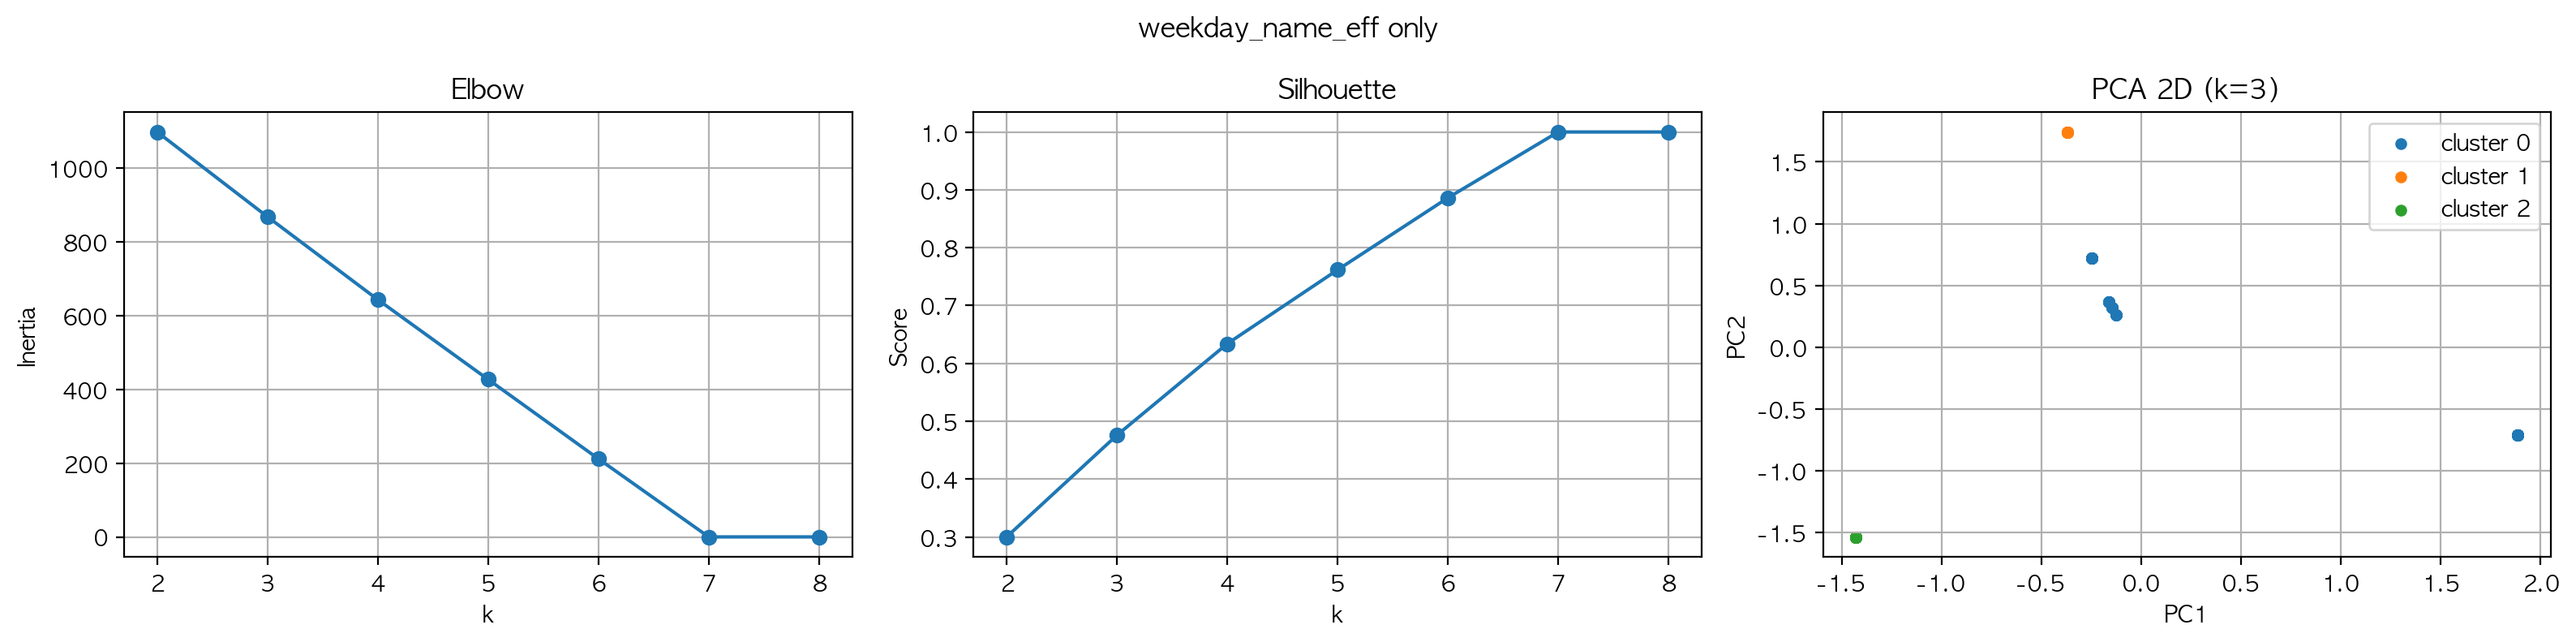

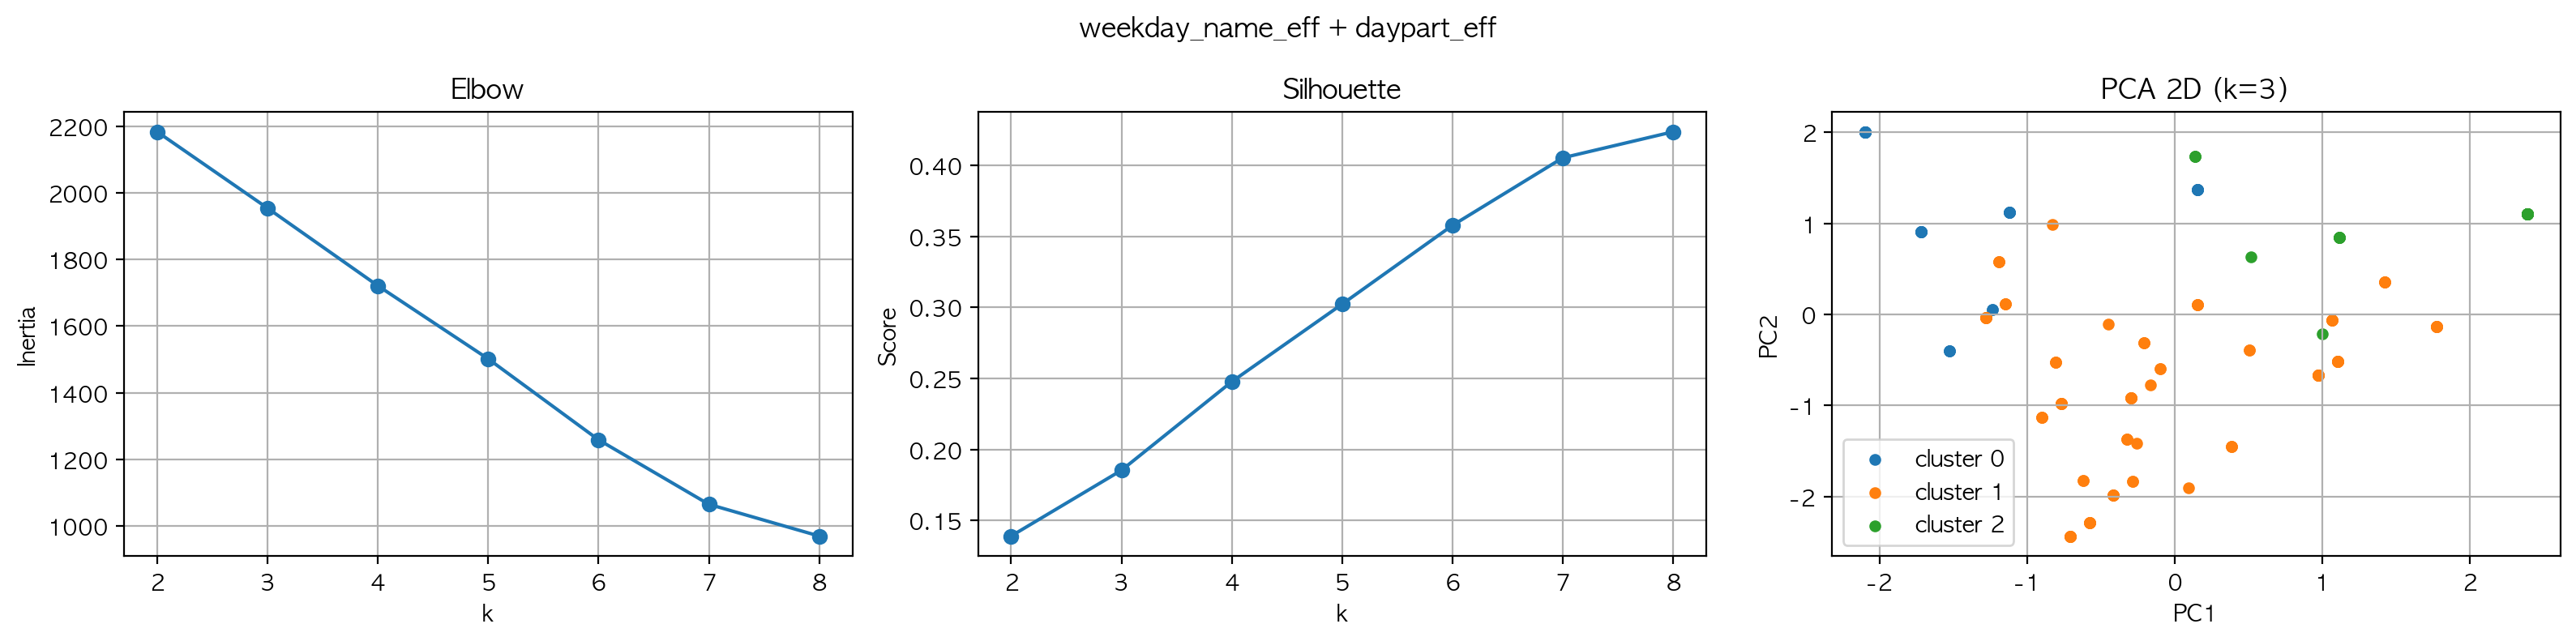

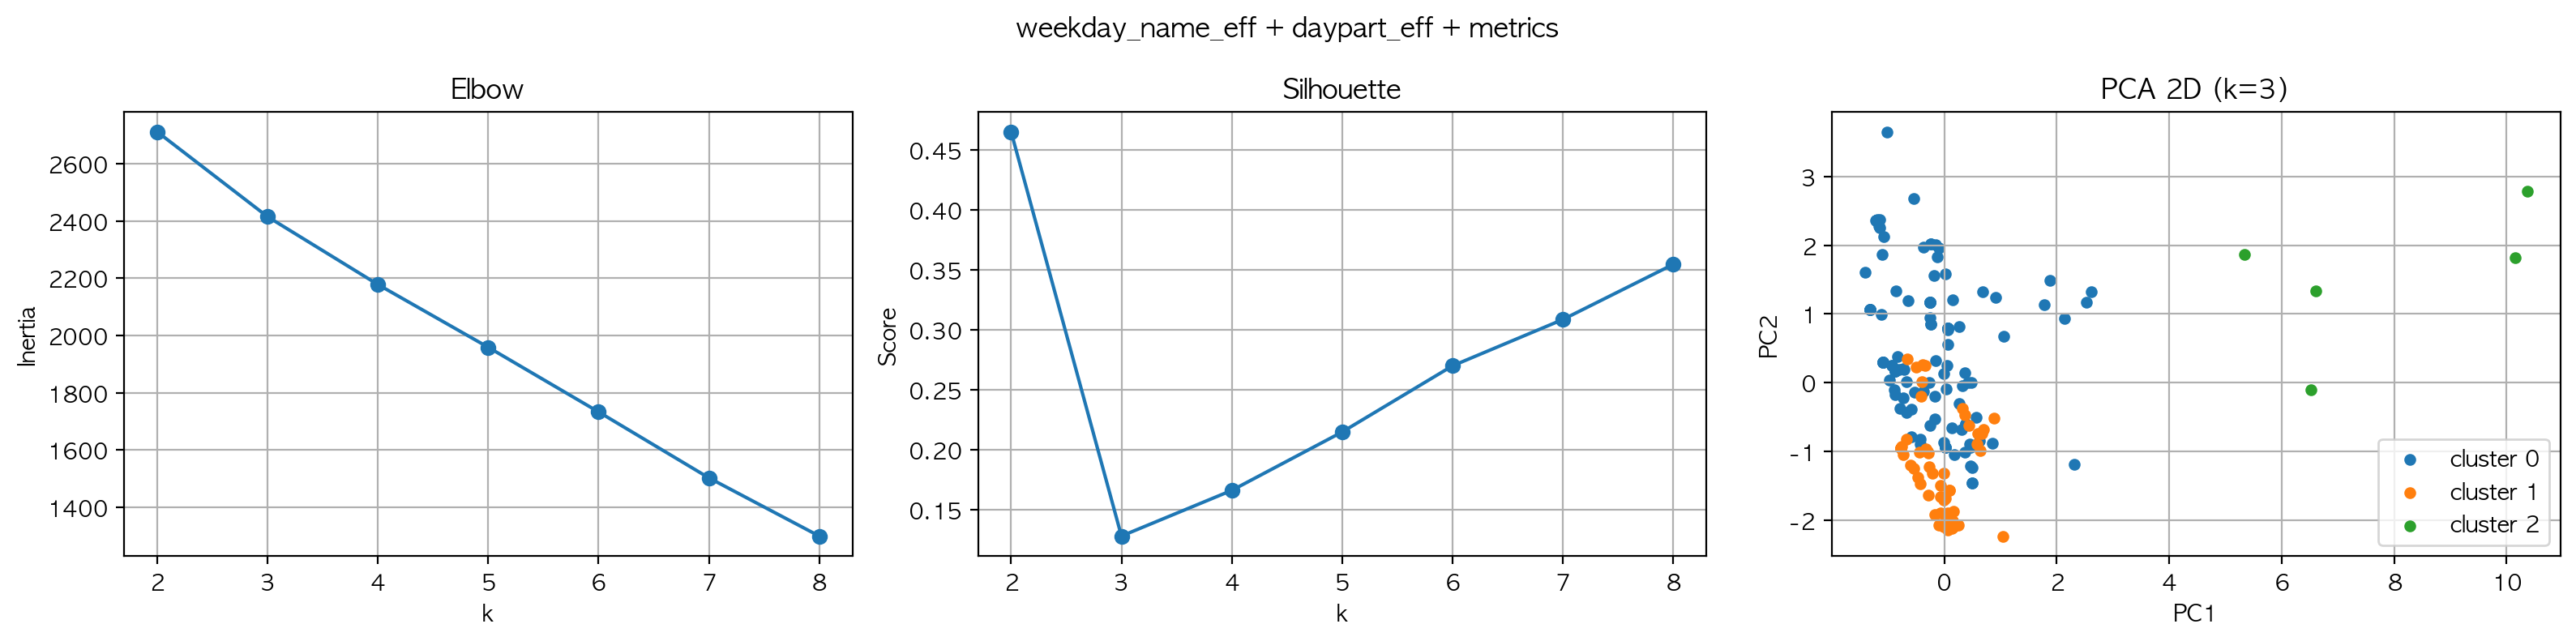

In [39]:
# 데이터 전처리
df = time_report[["weekday_name_eff","daypart_eff","clicks_eff","turns_eff","cvr_eff"]].copy()
df["daypart_eff"] = df["daypart_eff"].astype(str).str.replace(r"\(.*\)", "", regex=True).str.strip()
df["cvr_eff"] = np.where(df["clicks_eff"] > 0, df["turns_eff"] / df["clicks_eff"], 0)
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# 함수 정의
def clustering_eval_plot(X, title, set_k=3):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 엘보 / 실루엣 계산
    ks = range(2, 9)
    inertias, sil_scores = [], []
    for k in ks:
        km = KMeans(n_clusters=k, random_state=42, n_init=50)
        labels = km.fit_predict(X_scaled)
        inertias.append(km.inertia_)
        sil_scores.append(silhouette_score(X_scaled, labels))

    # 최종 모델 (내가 지정한 k)
    kmeans = KMeans(n_clusters=set_k, random_state=42, n_init=50)
    labels = kmeans.fit_predict(X_scaled)

    # PCA 시각화
    pca = PCA(n_components=2, random_state=42)
    coords = pca.fit_transform(X_scaled)

    # 그래프
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    axes[0].plot(list(ks), inertias, marker='o')
    axes[0].set_title("Elbow"); axes[0].set_xlabel("k"); axes[0].set_ylabel("Inertia"); axes[0].grid(True)

    axes[1].plot(list(ks), sil_scores, marker='o')
    axes[1].set_title("Silhouette"); axes[1].set_xlabel("k"); axes[1].set_ylabel("Score"); axes[1].grid(True)

    for c in range(set_k):
        idx = labels == c
        axes[2].scatter(coords[idx,0], coords[idx,1], s=18, label=f"cluster {c}")
    axes[2].set_title(f"PCA 2D (k={set_k})"); axes[2].set_xlabel("PC1"); axes[2].set_ylabel("PC2"); axes[2].legend(); axes[2].grid(True)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    return labels

# 1. weekday_name_eff만
X1 = pd.get_dummies(df[["weekday_name_eff"]], drop_first=False)
labels1 = clustering_eval_plot(X1, "weekday_name_eff only", set_k=3)

# 2. weekday_name_eff + daypart_eff
X2 = pd.get_dummies(df[["weekday_name_eff","daypart_eff"]], drop_first=False)
labels2 = clustering_eval_plot(X2, "weekday_name_eff + daypart_eff", set_k=3)

# 3. weekday_name_eff + daypart_eff + 성과지표
X3_cat = pd.get_dummies(df[["weekday_name_eff","daypart_eff"]], drop_first=False)
X3_num = df[["clicks_eff","turns_eff","cvr_eff"]]
X3 = pd.concat([X3_cat, X3_num], axis=1)
labels3 = clustering_eval_plot(X3, "weekday_name_eff + daypart_eff + metrics", set_k=3)


In [42]:
time_report_with_cluster = time_report.copy()
time_report_with_cluster["cluster_wk"] = labels1   # weekday_name_eff만 사용한 결과
time_report_with_cluster["cluster_wk_dp"] = labels2 # weekday_name_eff + daypart_eff
time_report_with_cluster["cluster_all"] = labels3  # 모든 feature 사용

# 클러스터별 평균 프로필 확인
def cluster_summary(X, labels, title):
    profile = (
        pd.DataFrame(X, columns=X.columns)
        .assign(cluster=labels)
        .groupby("cluster")
        .mean()
    )
    print(f"\n==== {title} ====")
    display(profile)

cluster_summary(X1, labels1, "weekday_name_eff only")
cluster_summary(X2, labels2, "weekday_name_eff + daypart_eff")
cluster_summary(X3, labels3, "weekday_name_eff + daypart_eff + metrics")

# mda_idx별 클러스터 배정 결과
display(time_report_with_cluster[["mda_idx","cluster_wk","cluster_wk_dp","cluster_all"]].head(20))



==== weekday_name_eff only ====


,weekday_name_eff_금,weekday_name_eff_목,weekday_name_eff_수,weekday_name_eff_월,weekday_name_eff_일,weekday_name_eff_토,weekday_name_eff_화
cluster,,,,,,,
0,0.372881,0.237288,0.135593,0.0,0.09322,0.0,0.161017
1,0.000000,0.000000,0.000000,0.0,0.00000,1.0,0.000000
2,0.000000,0.000000,0.000000,1.0,0.00000,0.0,0.000000



==== weekday_name_eff + daypart_eff ====


,weekday_name_eff_금,weekday_name_eff_목,weekday_name_eff_수,weekday_name_eff_월,weekday_name_eff_일,weekday_name_eff_토,weekday_name_eff_화,daypart_eff_낮,daypart_eff_새벽,daypart_eff_심야,daypart_eff_아침,daypart_eff_오후,daypart_eff_저녁
cluster,,,,,,,,,,,,,
0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.068182,0.159091,0.136364,0.045455,0.204545,0.386364
1,0.0,0.245614,0.140351,0.350877,0.096491,0.0,0.166667,0.157895,0.315789,0.149123,0.114035,0.140351,0.122807
2,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.666667,0.181818,0.030303,0.030303,0.090909



==== weekday_name_eff + daypart_eff + metrics ====


,weekday_name_eff_금,weekday_name_eff_목,weekday_name_eff_수,weekday_name_eff_월,weekday_name_eff_일,weekday_name_eff_토,weekday_name_eff_화,daypart_eff_낮,daypart_eff_새벽,daypart_eff_심야,daypart_eff_아침,daypart_eff_오후,daypart_eff_저녁,clicks_eff,turns_eff,cvr_eff
cluster,,,,,,,,,,,,,,,,
0,0.303279,0.131148,0.065574,0.245902,0.057377,0.081967,0.114754,0.172131,0.0,0.221311,0.131148,0.196721,0.278689,290.008197,142.868852,0.732489
1,0.093750,0.140625,0.125000,0.156250,0.062500,0.343750,0.078125,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,282.890625,180.437500,0.722196
2,0.200000,0.600000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.2,0.400000,0.000000,0.400000,0.000000,12068.600000,7925.400000,0.663277


,mda_idx,cluster_wk,cluster_wk_dp,cluster_all
0,12,0,1,0
1,14,0,0,0
2,18,2,1,0
3,22,0,0,0
4,26,0,1,1
5,30,1,2,0
6,32,0,1,0
7,54,0,0,0
8,56,0,1,0
9,58,0,0,2


클러스터별 패턴 평균값:
         slot_match  weekday_name_eff_금  weekday_name_eff_목  \
cluster                                                       
0          0.107692            0.092308            0.123077   
1          0.133333            0.383333            0.050000   
2          0.060606            0.212121            0.287879   

         weekday_name_eff_수  weekday_name_eff_월  weekday_name_eff_일  \
cluster                                                               
0                  0.107692            0.153846            0.061538   
1                  0.016667            0.250000            0.100000   
2                  0.106061            0.212121            0.030303   

         weekday_name_eff_토  weekday_name_eff_화  daypart_eff_낮(10-14)  \
cluster                                                                 
0                  0.369231            0.092308              0.000000   
1                  0.133333            0.066667              0.000000   
2                  0.0

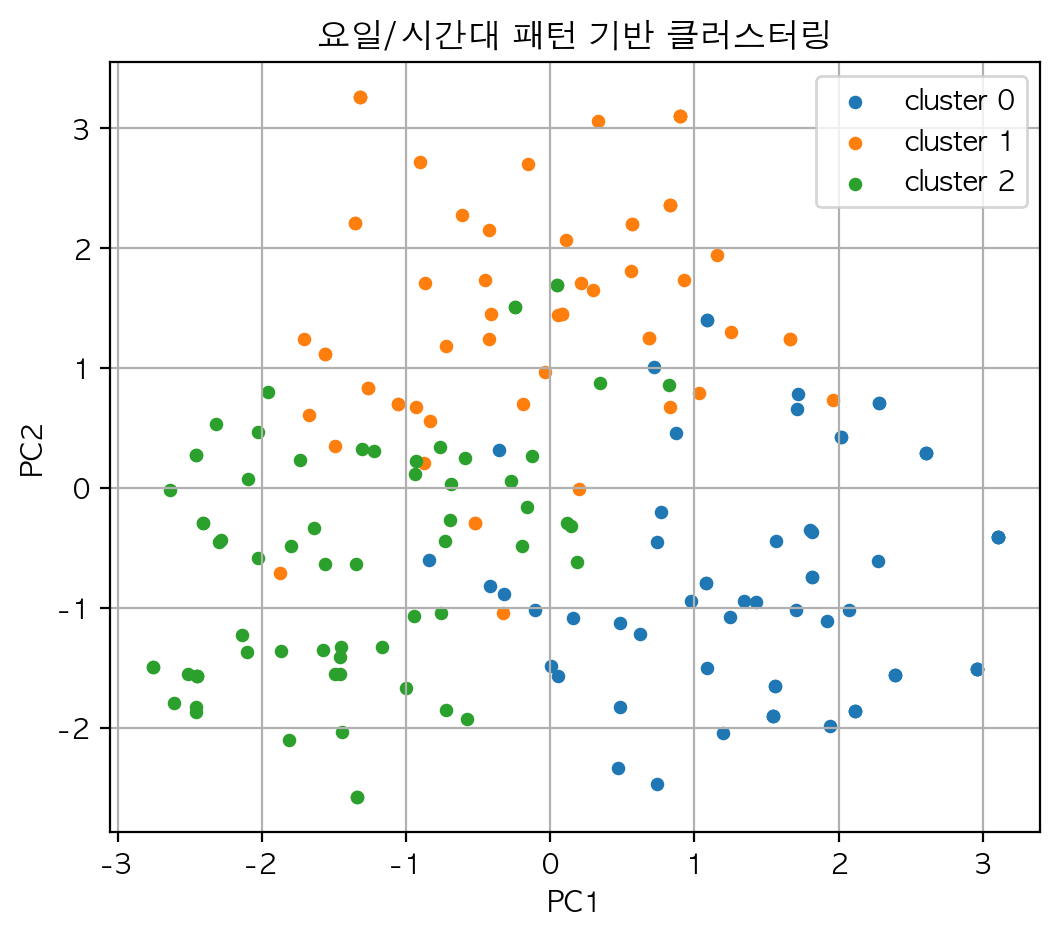

In [ ]:
time_report_km = time_report.copy()

# slot_match를 int 변환
time_report_km['slot_match'] = time_report_km['slot_match'].astype(int)

# 카테고리형 변수만 선택
pattern_features = time_report_km[['weekday_name_eff','daypart_eff','weekday_name_vol','daypart_vol','slot_match']].copy()

# 원핫 인코딩 (요일, 시간대 → 더미변수)
X = pd.get_dummies(pattern_features, drop_first=False)

# ------------------------------------
# 1) 스케일링 
# ------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# 2) 클러스터링 (예: k=3)
# ------------------------------------
k = 3
kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

time_report_km['cluster'] = labels

# ------------------------------------
# 3) 클러스터별 프로필 확인
# ------------------------------------
cluster_profile = (
    pd.concat([pd.DataFrame(X, index=time_report_km.index), time_report_km['cluster']], axis=1)
    .groupby('cluster')
    .mean()
)

print("클러스터별 패턴 평균값:")
print(cluster_profile)

# ------------------------------------
# 4) 시각화 (PCA로 2D 축소)
# ------------------------------------
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=15, label=f"cluster {c}")
plt.title("요일/시간대 패턴 기반 클러스터링")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


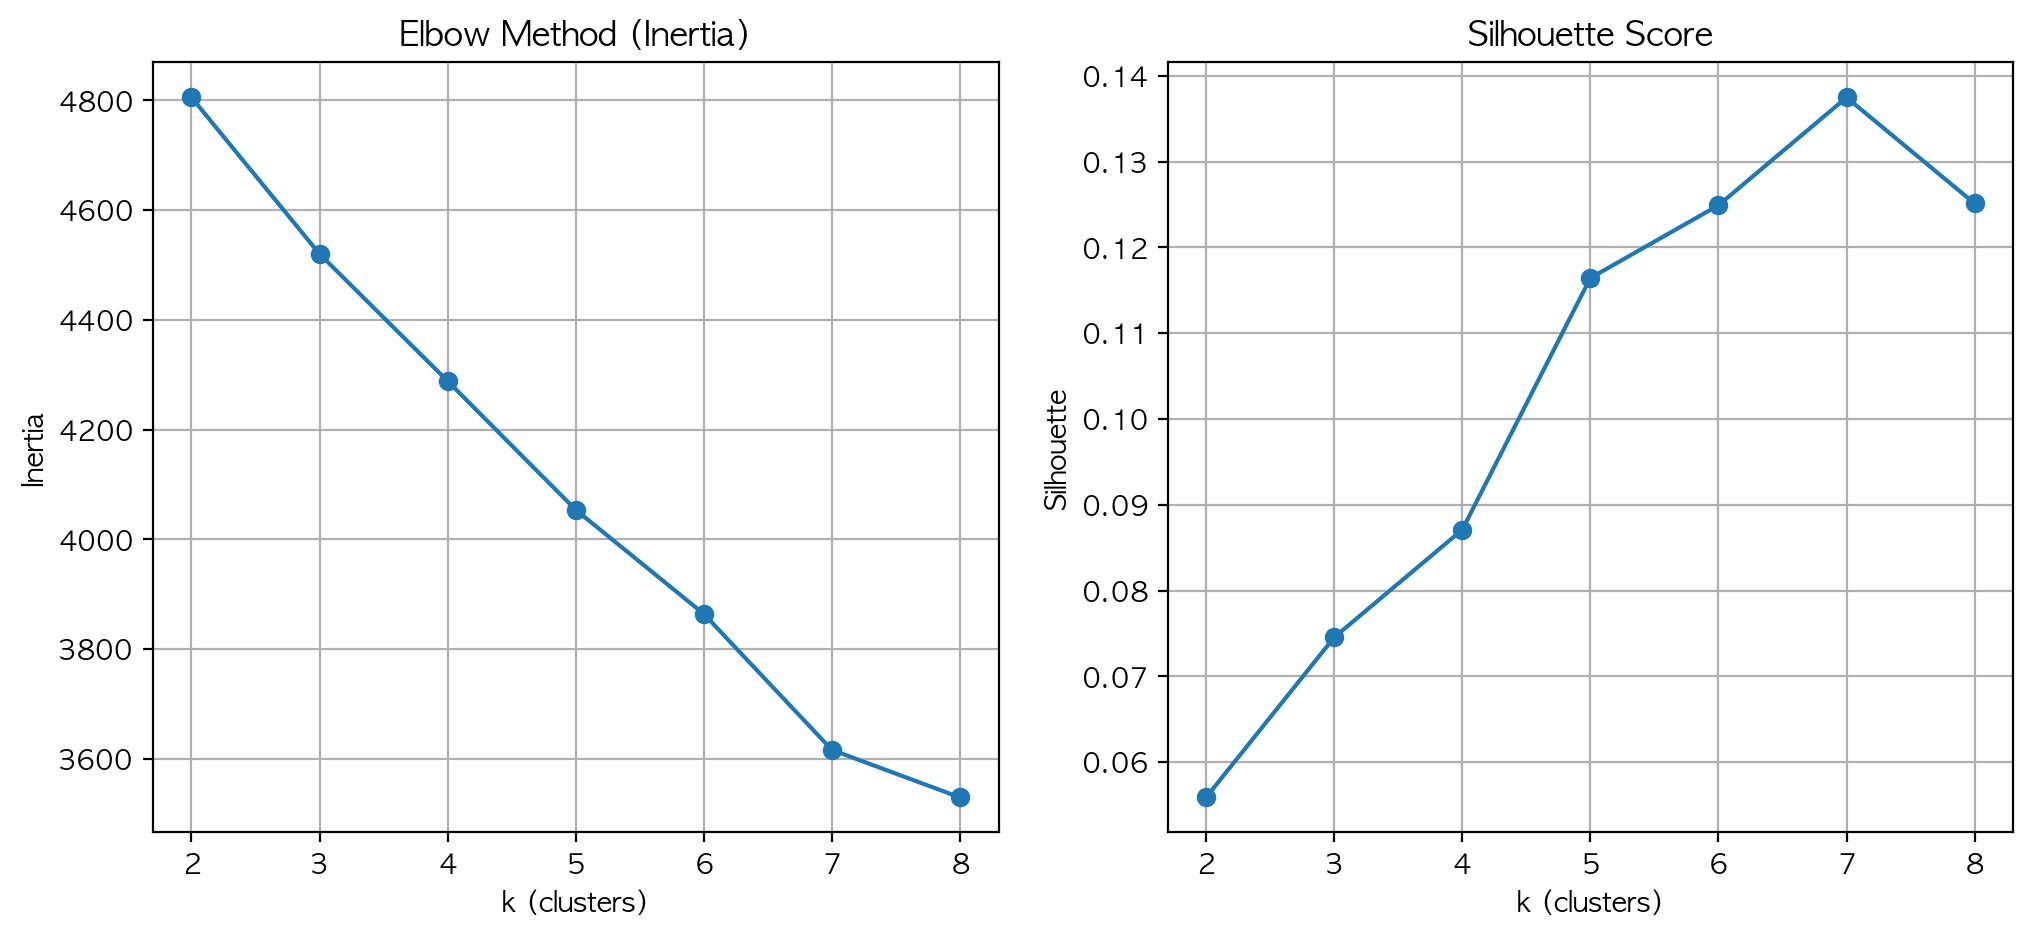

In [ ]:
# ------------------------------------
# 0) 데이터 준비 (요일/시간대 패턴만)
# ------------------------------------
time_report_km = time_report.copy()
time_report_km['slot_match'] = time_report_km['slot_match'].astype(int)

pattern_features = time_report_km[['weekday_name_eff','daypart_eff','weekday_name_vol','daypart_vol','slot_match']].copy()

# 원핫 인코딩
X = pd.get_dummies(pattern_features, drop_first=False)

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# 1) 엘보 & 실루엣 계산
# ------------------------------------
ks = range(2, 9)   # k=2~8까지 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)                        # 관성 (엘보)
    sil_scores.append(silhouette_score(X_scaled, labels))  # 실루엣 스코어

# ------------------------------------
# 2) 시각화
# ------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# 엘보법
axes[0].plot(ks, inertias, marker='o')
axes[0].set_title("Elbow Method (Inertia)")
axes[0].set_xlabel("k (clusters)")
axes[0].set_ylabel("Inertia")
axes[0].grid(True)

# 실루엣 스코어
axes[1].plot(ks, sil_scores, marker='o')
axes[1].set_title("Silhouette Score")
axes[1].set_xlabel("k (clusters)")
axes[1].set_ylabel("Silhouette")
axes[1].grid(True)

plt.show()


/var/folders/h_/w4rld_6j5l13g0td8v__qc7r0000gn/T/ipykernel_18352/3943086699.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eff_df['cvr_eff'].replace([np.inf, -np.inf], np.nan, inplace=True)


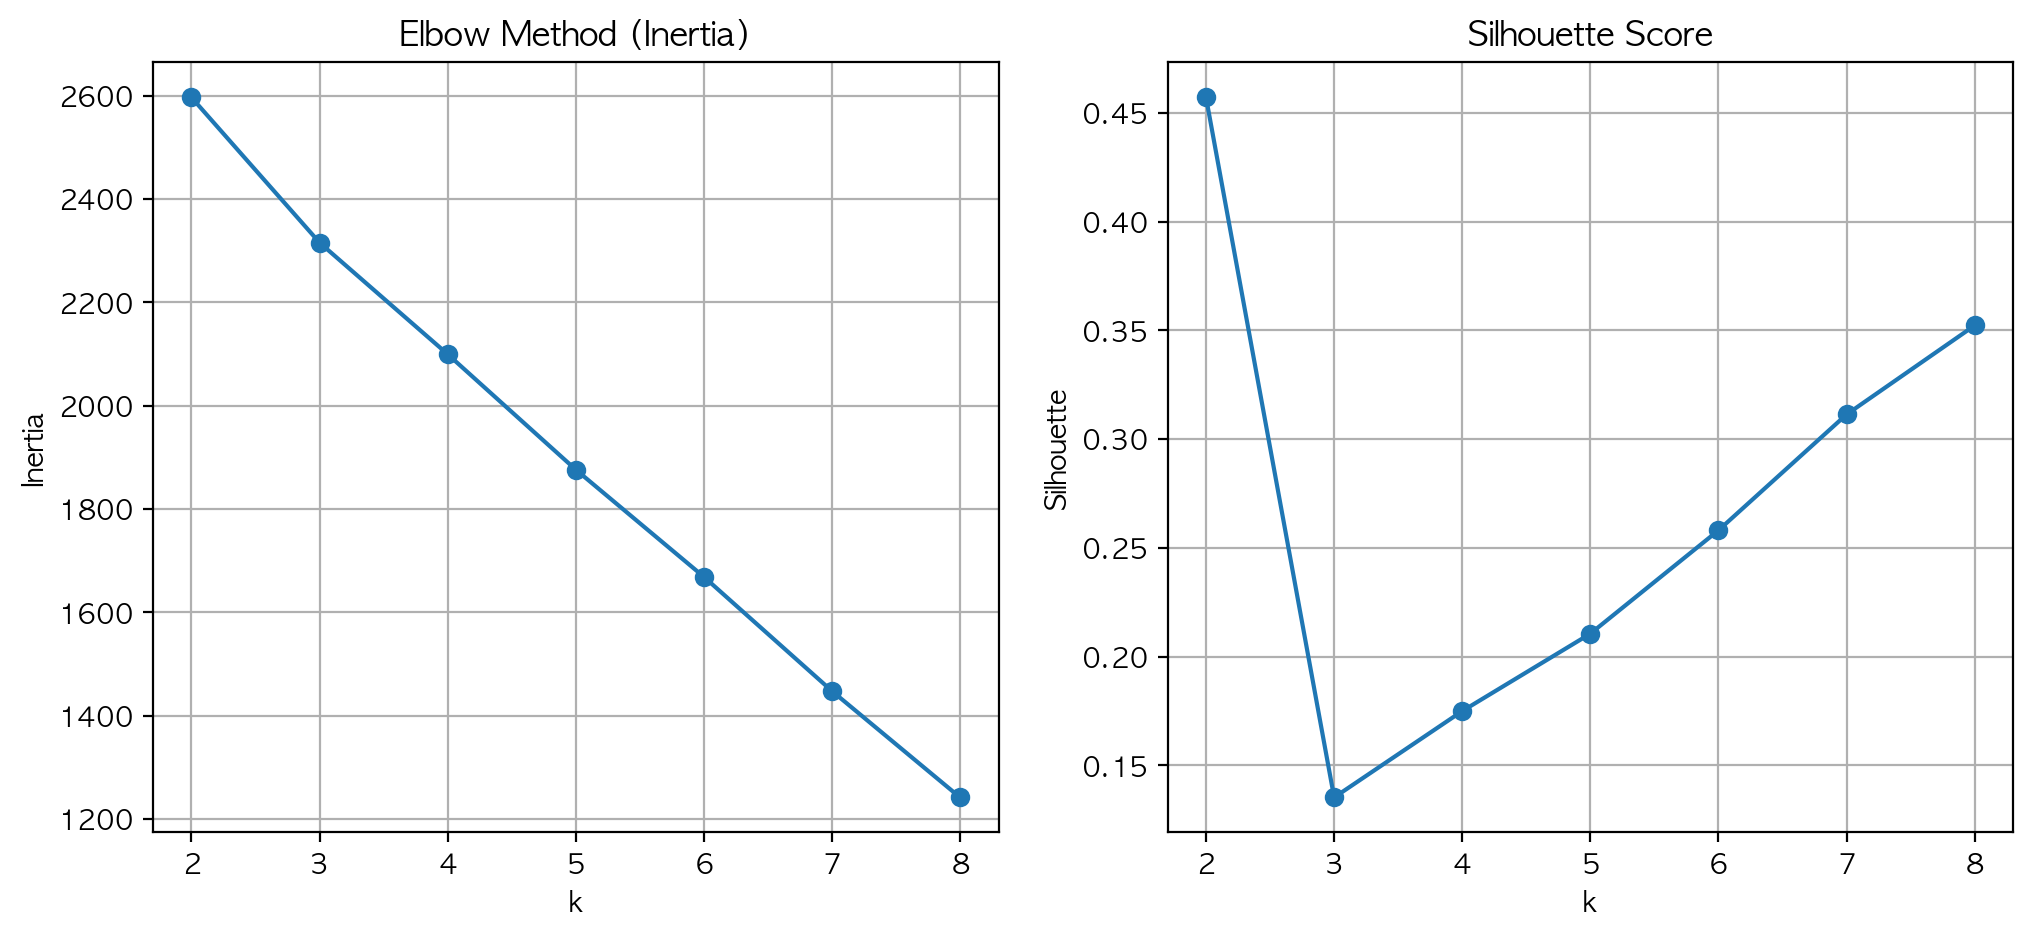

클러스터별 평균값
         weekday_name_eff_금  weekday_name_eff_목  weekday_name_eff_수  \
cluster                                                               
0                       0.0            0.277778                 0.0   
1                       1.0            0.000000                 0.0   
2                       0.2            0.600000                 0.0   
3                       0.0            0.000000                 1.0   
4                       0.0            0.000000                 0.0   

         weekday_name_eff_월  weekday_name_eff_일  weekday_name_eff_토  \
cluster                                                               
0                  0.411111            0.122222                 0.0   
1                  0.000000            0.000000                 0.0   
2                  0.000000            0.000000                 0.2   
3                  0.000000            0.000000                 0.0   
4                  0.000000            0.000000                 1.

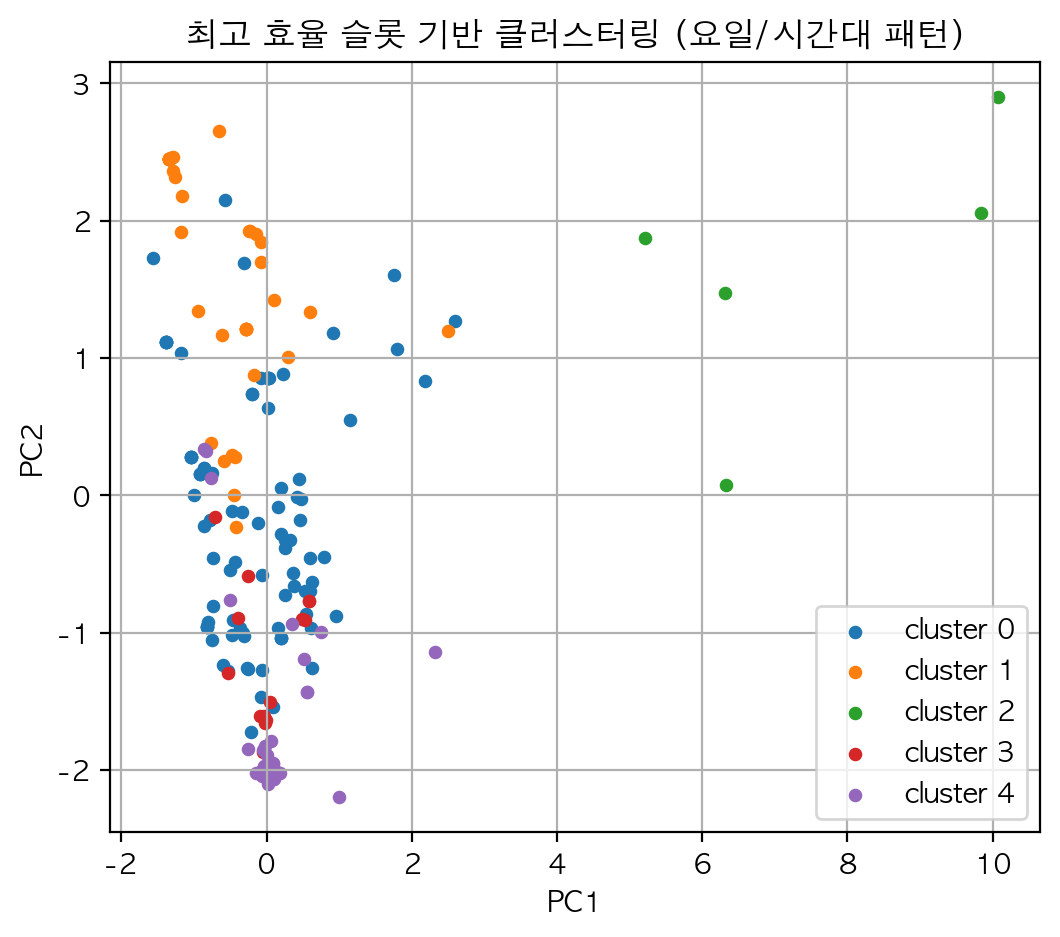

In [ ]:
# ------------------------------------
# 0) 데이터 준비
# ------------------------------------
df_df = time_report.copy()

# 최고 효율 슬롯 관련 컬럼만 선택
eff_df = df_df[['mda_idx','weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff']].copy()

# inf/NaN 처리
eff_df['cvr_eff'] = pd.to_numeric(eff_df['cvr_eff'], errors='coerce')
eff_df['cvr_eff'].replace([np.inf, -np.inf], np.nan, inplace=True)
eff_df = eff_df.dropna(subset=['cvr_eff'])

# ------------------------------------
# 1) 카테고리 → 원핫 인코딩
# ------------------------------------
X = pd.get_dummies(eff_df[['weekday_name_eff']], drop_first=False)

# 수치형 컬럼 합치기
X = pd.concat([X, eff_df[['clicks_eff','turns_eff','cvr_eff']]], axis=1)

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# 2) k 값 탐색 (엘보 & 실루엣)
# ------------------------------------
ks = range(2, 9)
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].plot(ks, inertias, marker='o')
axes[0].set_title("Elbow Method (Inertia)")
axes[0].set_xlabel("k")
axes[0].set_ylabel("Inertia")
axes[0].grid(True)

axes[1].plot(ks, sil_scores, marker='o')
axes[1].set_title("Silhouette Score")
axes[1].set_xlabel("k")
axes[1].set_ylabel("Silhouette")
axes[1].grid(True)
plt.show()

# ------------------------------------
# 3) 최종 클러스터링 (예: k=3)
# ------------------------------------
best_k = 5
kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

eff_df['cluster'] = labels

# ------------------------------------
# 4) 클러스터별 프로필
# ------------------------------------
cluster_profile = (
    pd.concat([pd.DataFrame(X, index=eff_df.index), eff_df['cluster']], axis=1)
    .groupby('cluster')
    .mean()
)

print("클러스터별 평균값")
print(cluster_profile)

# ------------------------------------
# 5) 시각화 (PCA)
# ------------------------------------
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=15, label=f"cluster {c}")
plt.title("최고 효율 슬롯 기반 클러스터링 (요일/시간대 패턴)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


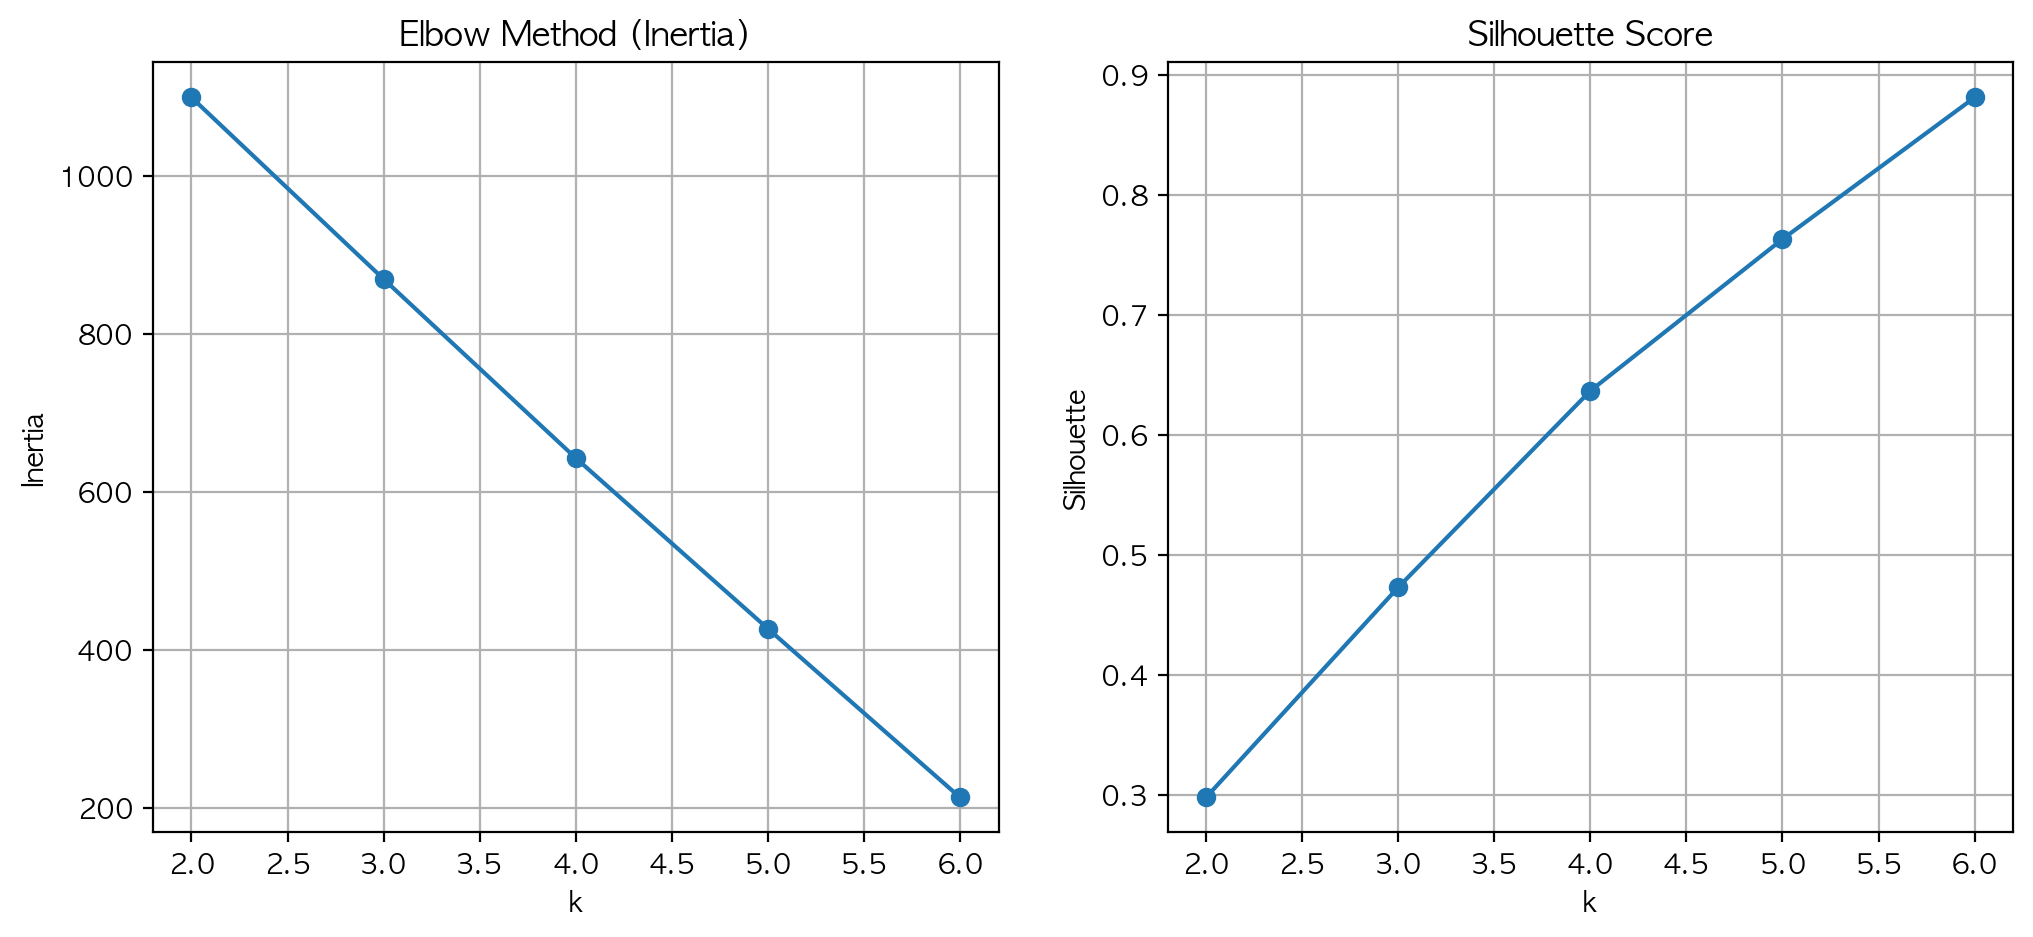

클러스터별 요일 분포:
weekday_name_eff         금         목        수    월        일    토         화
cluster                                                                   
0                 0.361345  0.252101  0.12605  0.0  0.10084  0.0  0.159664
1                 0.000000  0.000000  0.00000  1.0  0.00000  0.0  0.000000
2                 0.000000  0.000000  0.00000  0.0  0.00000  1.0  0.000000


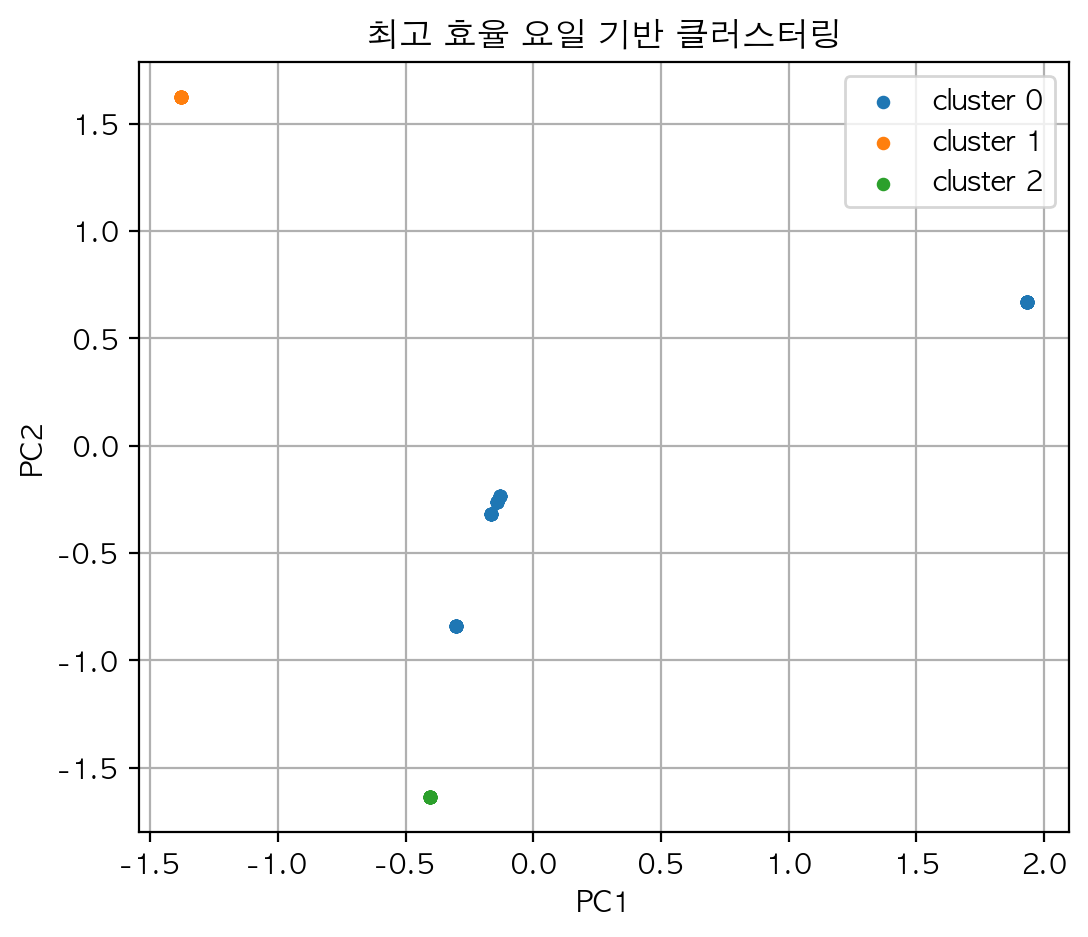

In [ ]:
# ------------------------------------
# 0) 데이터 준비
# ------------------------------------
df = time_report.copy()

# 최고 효율 요일만 추출
X = pd.get_dummies(df[['weekday_name_eff']], drop_first=False)

# ------------------------------------
# 1) 스케일링
# ------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# 2) k 값 탐색 (엘보 & 실루엣)
# ------------------------------------
ks = range(2, 7)   # k=2~6 정도 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].plot(ks, inertias, marker='o')
axes[0].set_title("Elbow Method (Inertia)")
axes[0].set_xlabel("k")
axes[0].set_ylabel("Inertia")
axes[0].grid(True)

axes[1].plot(ks, sil_scores, marker='o')
axes[1].set_title("Silhouette Score")
axes[1].set_xlabel("k")
axes[1].set_ylabel("Silhouette")
axes[1].grid(True)
plt.show()

# ------------------------------------
# 3) 최종 클러스터링 (예: k=3)
# ------------------------------------
best_k = 3
kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df['cluster'] = labels

# ------------------------------------
# 4) 클러스터별 분포
# ------------------------------------
cluster_profile = df.groupby('cluster')['weekday_name_eff'].value_counts(normalize=True).unstack().fillna(0)
print("클러스터별 요일 분포:")
print(cluster_profile)

# ------------------------------------
# 5) 시각화 (PCA)
# ------------------------------------
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=15, label=f"cluster {c}")
plt.title("최고 효율 요일 기반 클러스터링")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


클러스터별 패턴 평균값:
         slot_match  weekday_name_eff_금  weekday_name_eff_목  \
cluster                                                       
0          0.046512                 1.0             0.00000   
1          0.147826                 0.0             0.26087   
2          0.000000                 0.0             0.00000   

         weekday_name_eff_수  weekday_name_eff_월  weekday_name_eff_일  \
cluster                                                               
0                  0.000000             0.00000            0.000000   
1                  0.130435             0.33913            0.104348   
2                  0.000000             0.00000            0.000000   

         weekday_name_eff_토  weekday_name_eff_화  daypart_eff_낮  \
cluster                                                          
0                       0.0            0.000000       0.069767   
1                       0.0            0.165217       0.139130   
2                       1.0            0.000000   

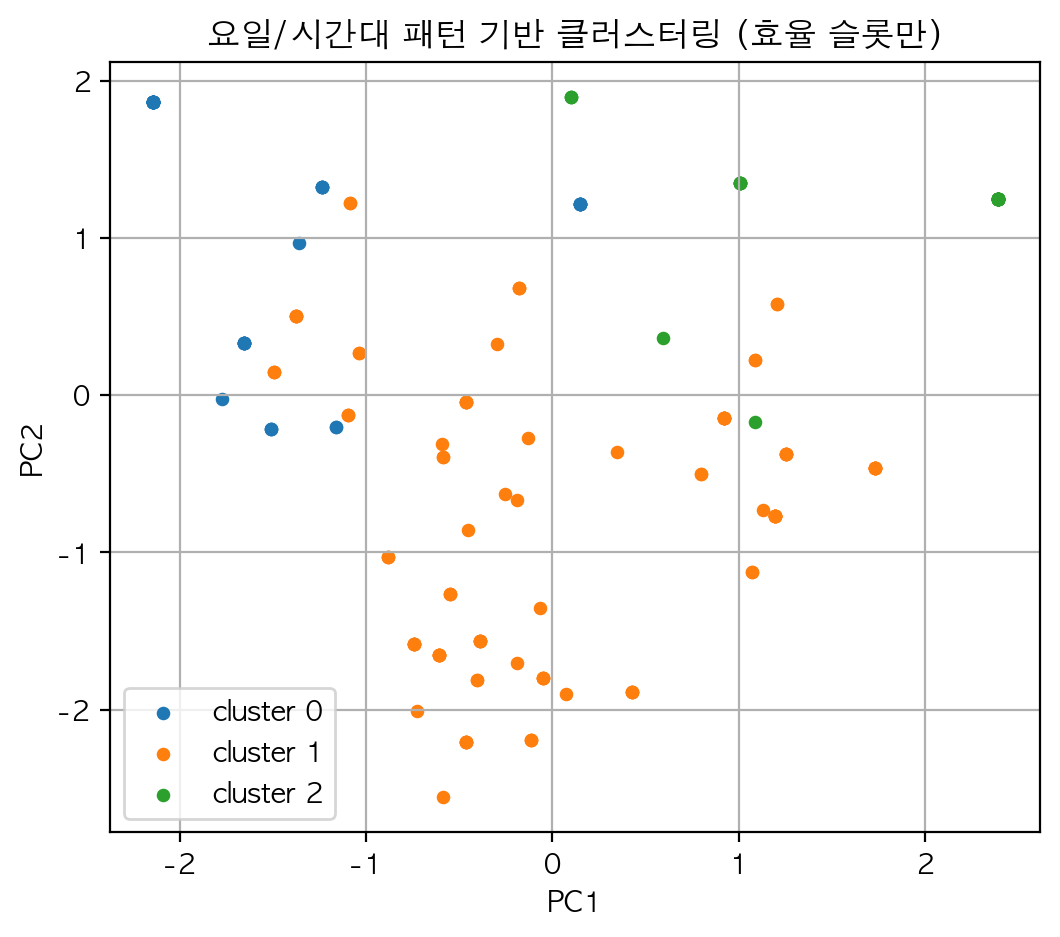

In [ ]:
# ------------------------------------
# 0) 데이터 준비
# ------------------------------------
time_report_km = time_report.copy()

# slot_match int 변환
time_report_km['slot_match'] = time_report_km['slot_match'].astype(int)

# ✅ 효율 슬롯만 선택 (볼륨 제외)
pattern_features = time_report_km[['weekday_name_eff', 'daypart_eff', 'slot_match']].copy()

# 원핫 인코딩
X = pd.get_dummies(pattern_features, drop_first=False)

# ------------------------------------
# 1) 스케일링 
# ------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# 2) 클러스터링 (예: k=3)
# ------------------------------------
k = 3
kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

time_report_km['cluster'] = labels

# ------------------------------------
# 3) 클러스터별 프로필 확인
# ------------------------------------
cluster_profile = (
    pd.concat([pd.DataFrame(X, index=time_report_km.index), time_report_km['cluster']], axis=1)
    .groupby('cluster')
    .mean()
)

print("클러스터별 패턴 평균값:")
print(cluster_profile)

# ------------------------------------
# 4) 시각화 (PCA로 2D 축소)
# ------------------------------------
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=15, label=f"cluster {c}")
plt.title("요일/시간대 패턴 기반 클러스터링 (효율 슬롯만)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


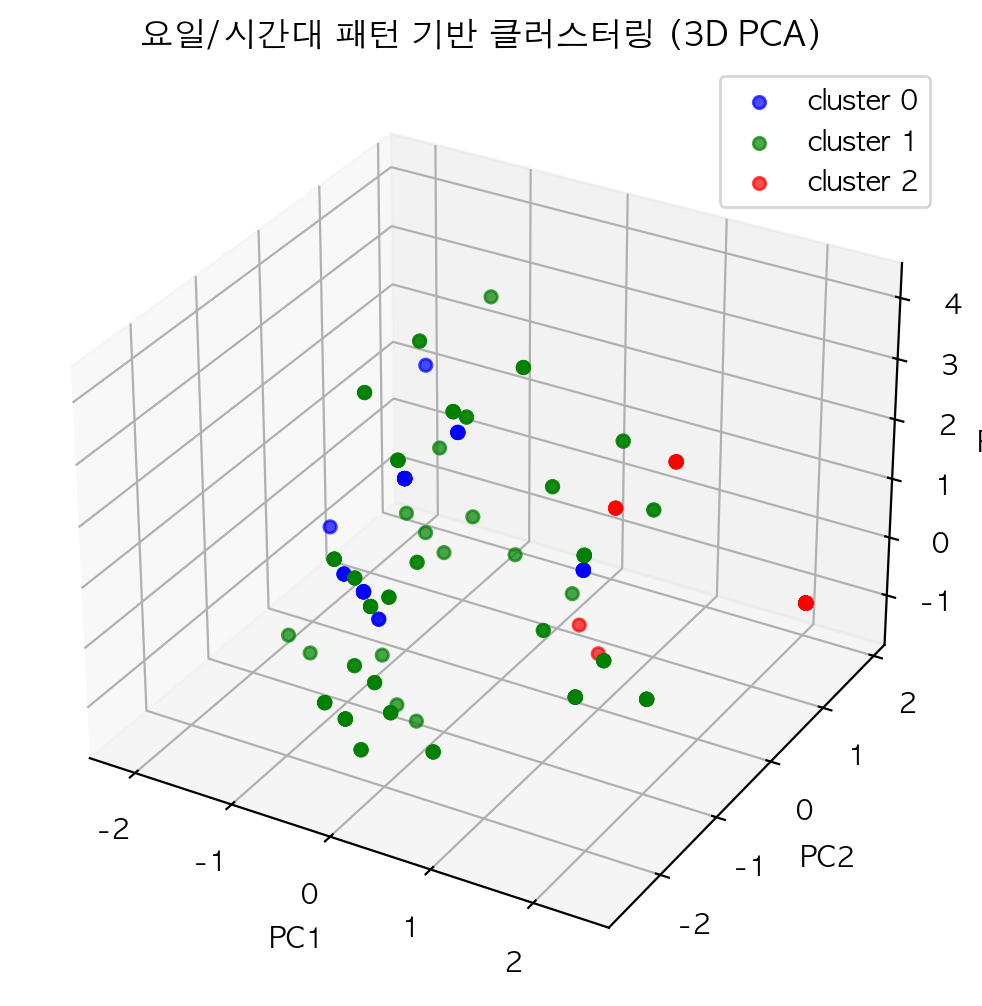

In [ ]:
# ------------------------------------
# 3D PCA 변환
# ------------------------------------
pca_3d = PCA(n_components=3, random_state=42)
coords_3d = pca_3d.fit_transform(X_scaled)

# ------------------------------------
# 3D 시각화
# ------------------------------------
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # 최대 7개 색상
for c in range(k):
    idx = (labels == c)
    ax.scatter(coords_3d[idx,0], coords_3d[idx,1], coords_3d[idx,2], 
               s=20, c=colors[c % len(colors)], label=f"cluster {c}", alpha=0.7)

ax.set_title("요일/시간대 패턴 기반 클러스터링 (3D PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()


In [ ]:
# ------------------------------------
# 0) 데이터 준비
# ------------------------------------
features = ["weekday_name_eff","daypart_eff","clicks_eff","turns_eff","cvr_eff"]
df = time_report[features].copy()

# 범주형 → 원핫 인코딩
df_enc = pd.get_dummies(df[["weekday_name_eff","daypart_eff"]], drop_first=False)

# 수치형 그대로 추가
df_num = df[["clicks_eff","turns_eff","cvr_eff"]]

X = pd.concat([df_enc, df_num], axis=1)

# ------------------------------------
# 1) 스케일링
# ------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------
# 2) KMeans 클러스터링
# ------------------------------------
k = 3  # 군집 개수 원하는대로 조정
kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
labels = kmeans.fit_predict(X_scaled)

time_report["cluster"] = labels

# ------------------------------------
# 3) 클러스터별 평균 프로필
# ------------------------------------
cluster_profile = pd.DataFrame(X, columns=X.columns).assign(cluster=labels).groupby("cluster").mean()
print("클러스터별 평균값:")
print(cluster_profile)

# ------------------------------------
# 4) 2D 시각화 (PCA)
# ------------------------------------
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=15, label=f"cluster {c}")
plt.title("효율 슬롯 기반 클러스터링")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


ValueError: Input X contains infinity or a value too large for dtype('float64').

=== 클러스터 요약 ===
   cluster    n top_weekday top_daypart    avg_clicks    avg_turns   avg_cvr
0        0    5           목          심야  12068.600000  7925.400000  0.663277
1        1  130           월          새벽    290.500000   161.969231  0.595319
2        2   56           금          저녁    280.482143   141.464286  0.896299


/var/folders/h_/w4rld_6j5l13g0td8v__qc7r0000gn/T/ipykernel_18352/641793038.py:45: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df_out.groupby("cluster").apply(cluster_summary).reset_index()


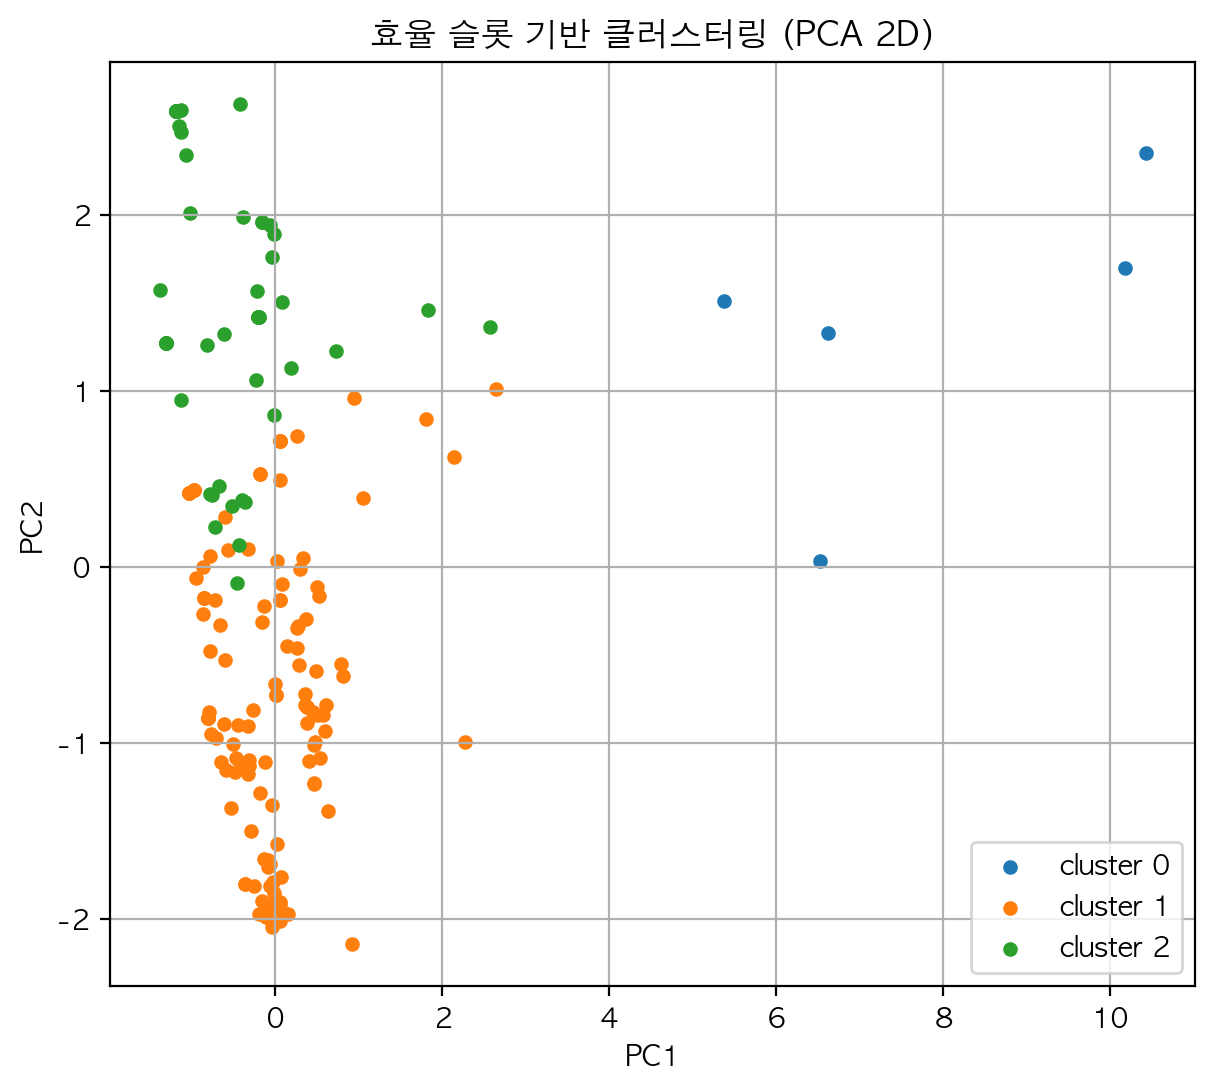

In [ ]:
# 0) 사용 컬럼만 추출
use_cols = ["weekday_name_eff","daypart_eff","clicks_eff","turns_eff","cvr_eff"]
df = time_report[use_cols].copy()


# - CVR 안전 계산(클릭 0이면 0)
df["cvr_eff"] = np.where(df["clicks_eff"] > 0,
                         df["turns_eff"] / df["clicks_eff"],
                         0)

# 결측/무한대 방지
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# 2) 인코딩 + 스케일링
X_cat = pd.get_dummies(df[["weekday_name_eff","daypart_eff"]], drop_first=False)
X_num = df[["clicks_eff","turns_eff","cvr_eff"]]
X = pd.concat([X_cat, X_num], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) KMeans (k 설정만 바꿔서 사용)
k = 3
km = KMeans(n_clusters=k, random_state=42, n_init=50)
labels = km.fit_predict(X_scaled)

df_out = df.copy()
df_out["cluster"] = labels

# 4) 클러스터 요약(가장 간단한 버전)
def cluster_summary(g: pd.DataFrame) -> pd.Series:
    # 모드(최빈) 요일/시간대
    w_mode = g["weekday_name_eff"].mode()
    d_mode = g["daypart_eff"].mode()
    return pd.Series({
        "n": len(g),
        "top_weekday": (w_mode.iat[0] if not w_mode.empty else None),
        "top_daypart": (d_mode.iat[0] if not d_mode.empty else None),
        "avg_clicks": g["clicks_eff"].mean(),
        "avg_turns": g["turns_eff"].mean(),
        "avg_cvr": np.where(g["clicks_eff"]>0,
                            g["turns_eff"]/g["clicks_eff"], 0).mean()
    })

summary = df_out.groupby("cluster").apply(cluster_summary).reset_index()
print("=== 클러스터 요약 ===")
print(summary)

# (원하시면 원-핫 평균 프로필도 확인 가능)
# profile = pd.DataFrame(X, columns=X.columns).assign(cluster=labels).groupby("cluster").mean()

# 5) 2D 시각화 (PCA)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
for c in range(k):
    idx = labels == c
    plt.scatter(coords[idx,0], coords[idx,1], s=18, label=f"cluster {c}")
plt.title("효율 슬롯 기반 클러스터링 (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

# 결과 데이터프레임: 각 매체사의 클러스터 라벨 포함
# df_out  # 필요시 확인


[INFO] 실루엣 최대 k = 2, score = 0.4644


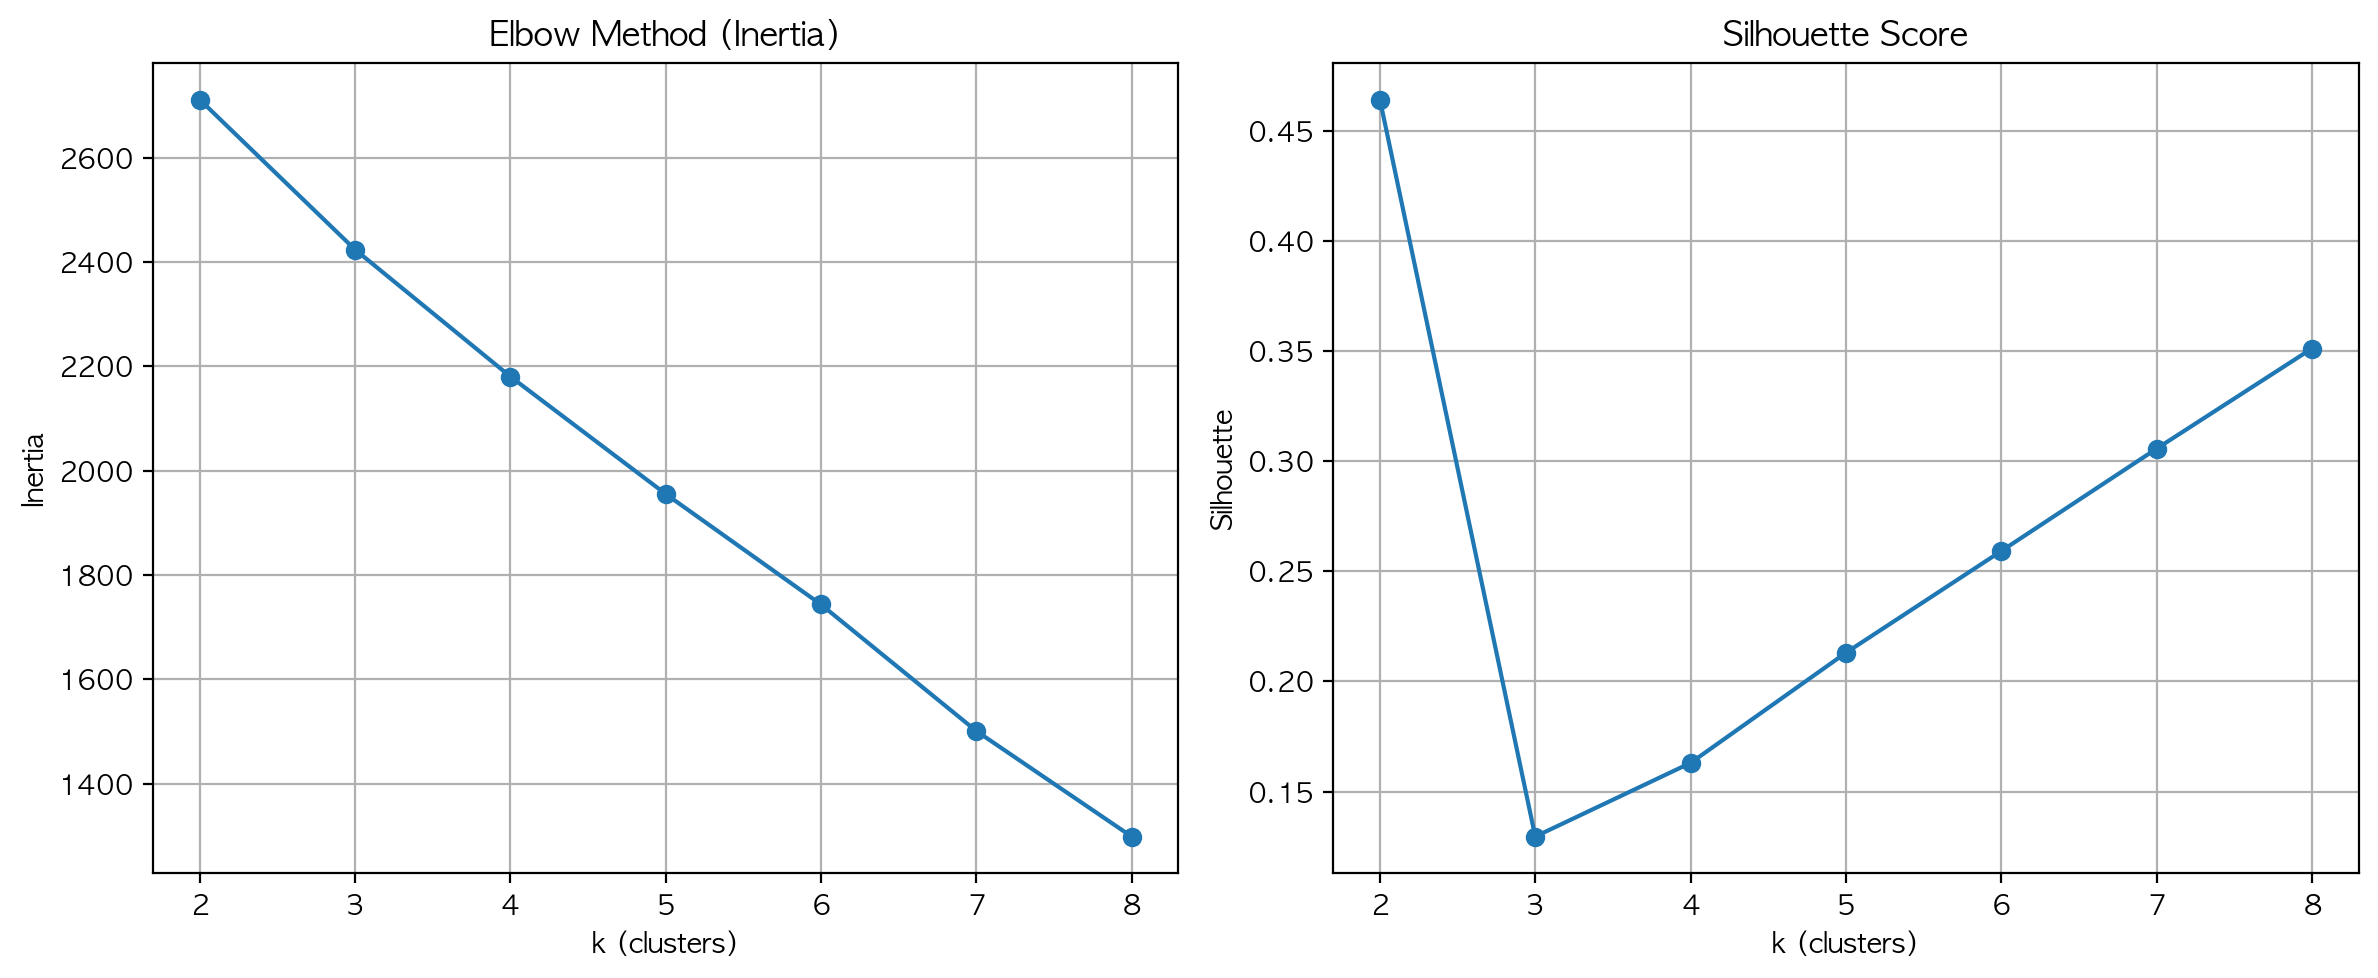

In [ ]:
ks = range(2, 9)   # k=2~8 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=50)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

best_k = ks[int(np.argmax(sil_scores))]
print(f"[INFO] 실루엣 최대 k = {best_k}, score = {max(sil_scores):.4f}")

# -----------------------------
# 2) 시각화
# -----------------------------
plt.figure(figsize=(12,5))

# 엘보
plt.subplot(1,2,1)
plt.plot(list(ks), inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("k (clusters)")
plt.ylabel("Inertia")
plt.grid(True)

# 실루엣
plt.subplot(1,2,2)
plt.plot(list(ks), sil_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("k (clusters)")
plt.ylabel("Silhouette")
plt.grid(True)

plt.tight_layout()
plt.show()